In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
%matplotlib inline

In [8]:
def bifurcation_plot(x_0, nmax = 100, savepng = False):
    
    r = np.arange(2, 4, .0001)
    
    fig = plt.figure(figsize=(10.5, 9), tight_layout=True)
    fig.patch.set_facecolor('white')

    x = x_0
    
    for i in range(1500):
        x = np.multiply(x, r) * np.subtract(1,x)
    
    for i in range(nmax):
        x = np.multiply(x, r) * np.subtract(1,x)
        plt.scatter(r,x,s =.0001, color = "black")
        
    
    # set y and x ticks
    # plt.xticks(np.linspace(1,4,11))
    plt.grid()

    plt.xlabel('r')
    plt.ylabel('x')
    
    plt.title("$x_0$ =" + str(x_0))
    
    if(savepng):
        fig.savefig("bif x_0=" + str(x_0) + ".png", bbox_inches='tight')
    
    plt.show()
    

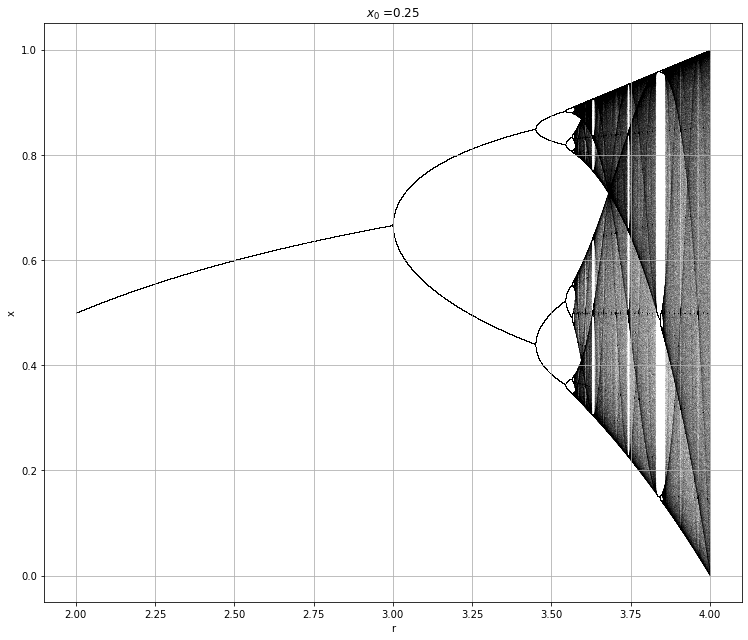

In [9]:
bifurcation_plot(.25, 500, savepng = True)

In [37]:
#does the actual cobwebplot
#savetofig = True if you want to save every step of the cobwebplot to a diff file
def cobwebplot_xo_r(r,x,color,n, savetofig=False):
    nx = r * np.multiply(x,  (-1*x + 1))
    plt.plot([x , x],[0,  nx], c=color)
    if savetofig:
        plt.savefig("x0.png")
    plt.plot([nx, x],[nx, nx], c=color)
    if savetofig:
        plt.savefig("x1.png")
    for i in range(n):
        x = nx
        nx = r * np.multiply(x,  (-1*x + 1))      
        plt.plot([x, x], [x,  nx], c=color) 
        if savetofig:
            plt.savefig("x" + str(i*2+2) +".png")
        plt.plot([nx,x], [nx, nx], c=color)
        if savetofig:
            plt.savefig("x" + str(i*2+3) +".png")
        x = nx
        #print(i, x)
    print(x)
    
    plt.title("r = " + str(r) + " n = " + str(n) + " x = " + str(x))

#makes the figure with the logistic equation and sets up all the figure options
def makefig(r):        
    fig = plt.figure(figsize=(10.5, 8))
    fig.patch.set_facecolor('white')
    ax = fig.gca()
    
    plt.suptitle("Logistic Equation")
    plt.xlabel("x_n")
    plt.ylabel("x_(n+1)")
    
    
    x = np.linspace(-0.01, 1.01, 1000)
    po = 0.05
    y = po / (po + (1-po)*np.exp(-r*x))
    y = r * np.multiply(x, 1-x)
    
    maxy = r*0.25
    maxy = 1.0
   
    
    #plt.imshow(fractal_grid, vmax = 0.01, cmap = lyap_cmap, origin = "lower", extent = (lowerbound, upperbound, lowerbound, upperbound))
   
    line = [[-0.01, maxy+0.1], [-0.01, maxy+0.1]] #line for y = x on the plt
    xaxes = [0, 0,             -0.06, 1.01] #line for the x axis
    yaxes = [-0.06, maxy+0.01, 0, 0] #line for the y axis
    #plt.grid(True)
    xs = np.arange(-0.1, 1.1, 0.05) #  list of xticks 
    ys = np.arange(0,maxy+0.1, 0.05) # list of yticks
    xticks = [] #this is for the labels on the xticks
    
    # setting up the list of strings for the xtick labels
    for i in range(len(xs)):
        if i%2 == 1:
            xticks.append("")
        else:
            xticks.append(str(np.floor(100*xs[i])/100))
            
    
    ax.set_xticks(xs) # set the x ticks (on the axis)
    ax.set_yticks(ys) # set the y ticks (on the axis)
    ax.set_xticklabels(xticks) #set the labels on the xticks
    # plt.locator_params(axis='x', nbins=12)
    plt.grid(True)  #draw the grid
    
    plt.plot(line[0], line[1], linestyle=":") # y=x
    plt.plot(xaxes[0:2], yaxes[0:2], c="k")   # x axis in black
    plt.plot(xaxes[2:4], yaxes[2:4], c="k")   # y axis in black
    plt.plot(x,y)


0.25


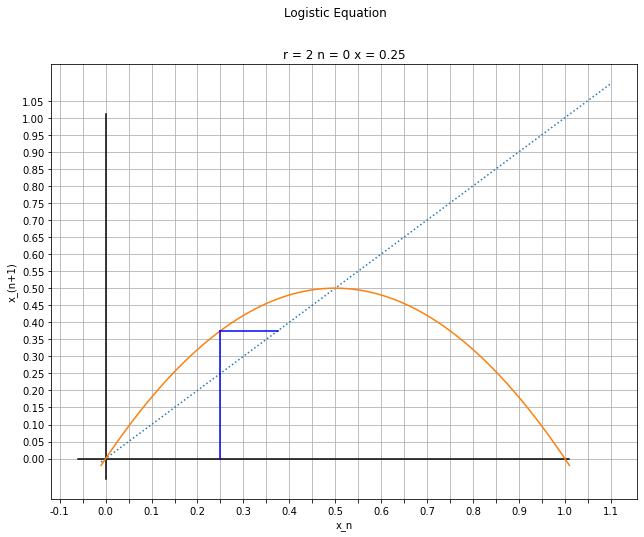

In [5]:
#r = 3.74 # 5 cycLe
#r = 3.9 # 3 cycle
#r = 3.3 # 2 cycle
#r = 2  #everything goes to 1/2

#x = 0.26
#x = 0.7
x = 0.25
#x = 0.2549
#r = 3.9 # use this for "chaos"
#r = 3.3 # use this for 2 cycle
r = 2  # use this for single stable fixed point

n = 0


makefig(r)
#cobwebplot_xo_r(r, 0.075, "b", n)
#cobwebplot_xo_r(r, 0.05, "c", n)
#cobwebplot_xo_r(r, 0.3, "m", n)
#cobwebplot_xo_r(r, 0.1, "m", n)
#cobwebplot_xo_r(r, 0.5, "r", n)
#cobwebplot_xo_r(r, 0.0, "k", n)
#cobwebplot_xo_r(r, 0.02,"orange", 10)
#cobwebplot_xo_r(r,x+0.00125, "m", n)
#cobwebplot_xo_r(r,x+0.0025,"b",n)

cobwebplot_xo_r(r, x, "b", n)


'''
#uncomment this block to gives some room on the right for our presentation
plt.subplots_adjust(top=0.88, bottom=0.11, left=0.11,right=0.80, hspace=0.2, wspace=0.2)

if r == 3.9:
    plt.figtext(0.82,0.4,"Try x_0 values:\n(Do only 4 iter'ns)\n------------------\nx_0 = 0.1\n\nx_0 = 0.05\n\nx_0 = 0.075\n\n--------\n\nx_0 = 0.70\n\nx_0 = 0.75\n\nx_0 = 0.8", None, size=14)
elif r == 3.3:
    plt.figtext(0.82,0.5,"Try x_0 values:\n------------------\nx_0 = 0.8\n\nx_0 = 0.75\n\nx_0 = 0.5\n\n-----------------\n\nx_0 = 0.1\n\nx_0 = 0.2", None, size=14)
else:
    plt.figtext(0.82,0.4,"   Try the\n following\nx_0 values:\n------------------\nx_0 = 0.3\n\nx_0 = 0.8\n\nx_0 = 0.1\n\nx_0 = 0.5\n\nx_0 = 0.0\n\nx_0 = 0.01\n\nx_0 = 1.0",None,size=14)
'''

#you can use png or .pdf for save fig to save to other file types. You can also
# comment out this line if you don't want to save the figure to anything
plt.savefig("webr=" + str(r) + "n=" + str(n) + ".png") # pass the option "True" if you want to save every step of the cobwebplot
plt.show()

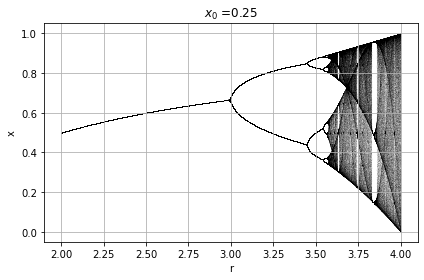

0.25


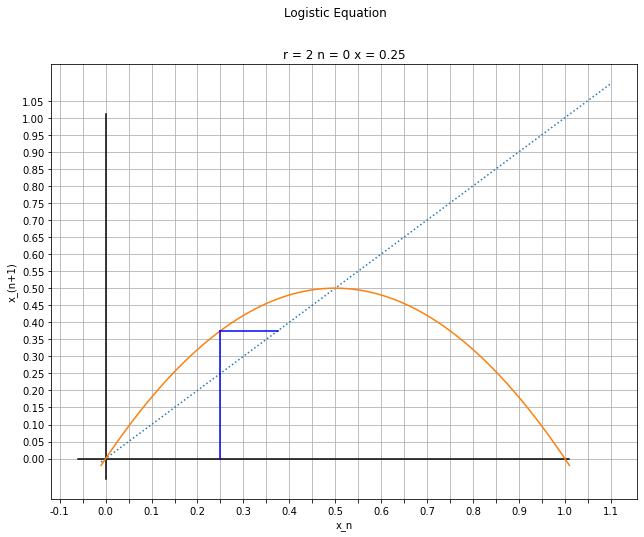

0.46875


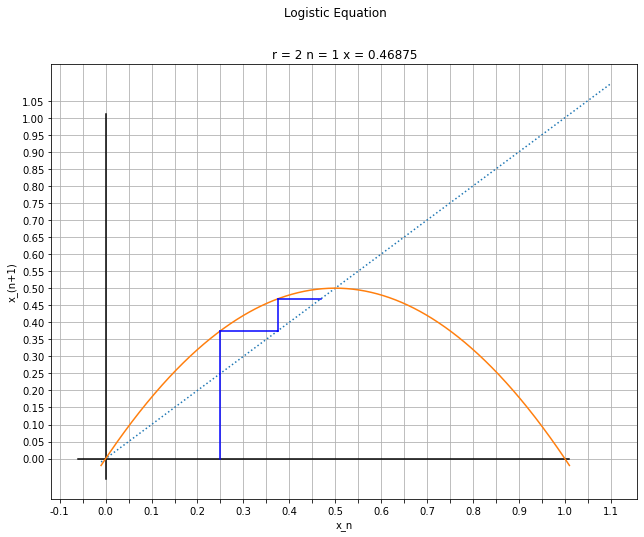

0.498046875


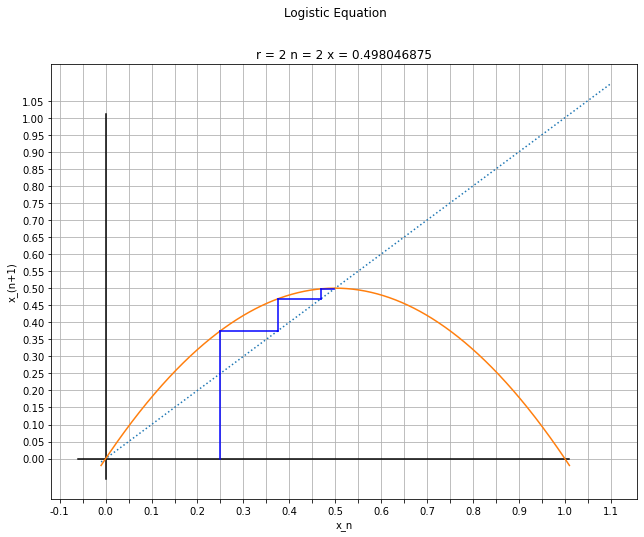

0.49999237060546875


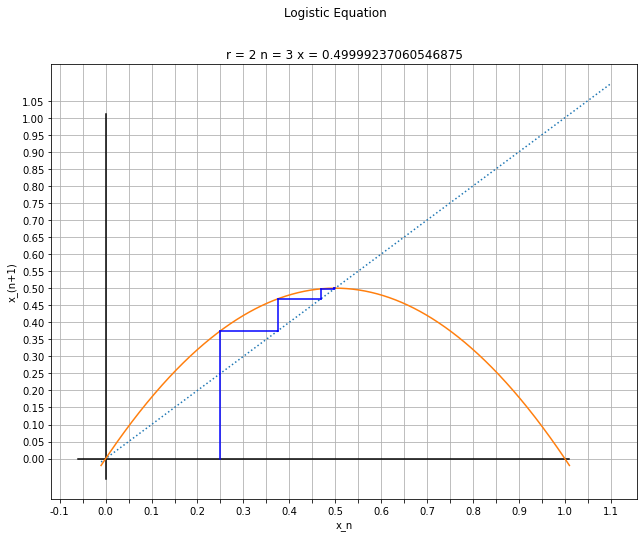

0.4999999998835847


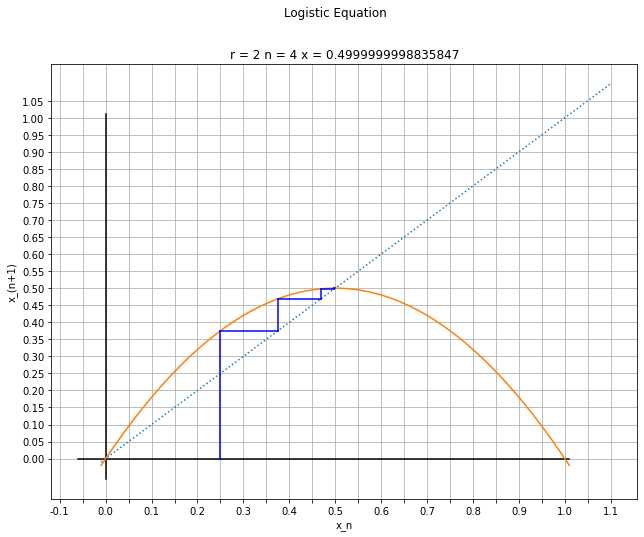

0.5


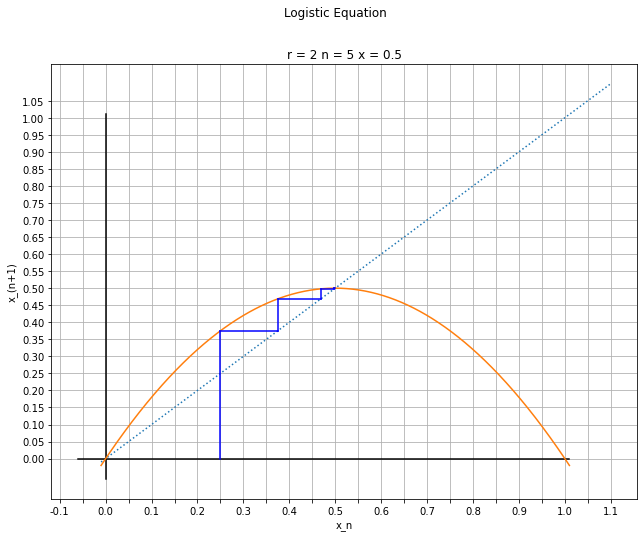

0.5


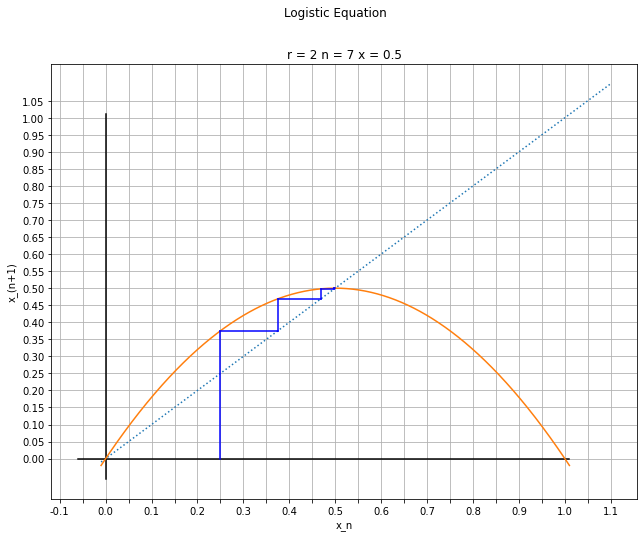

0.5


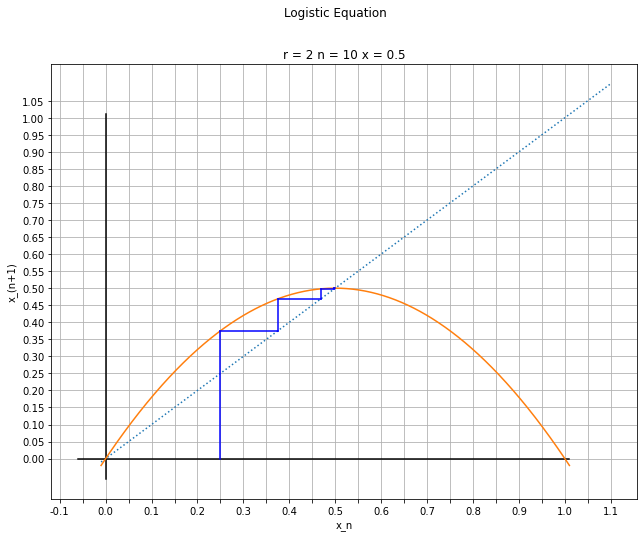

0.5


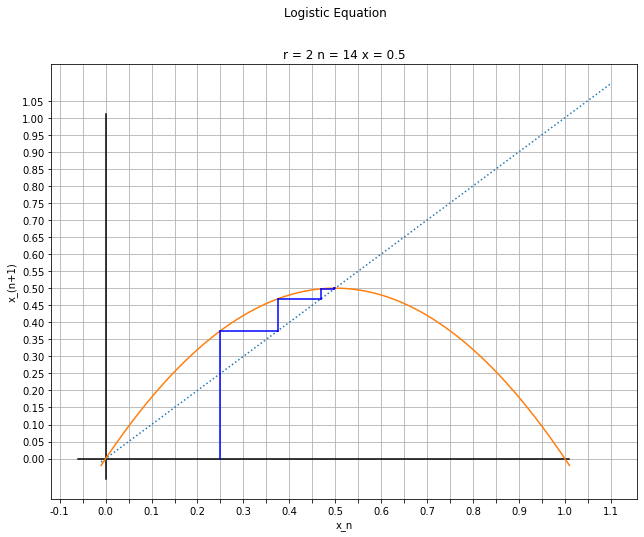

0.5


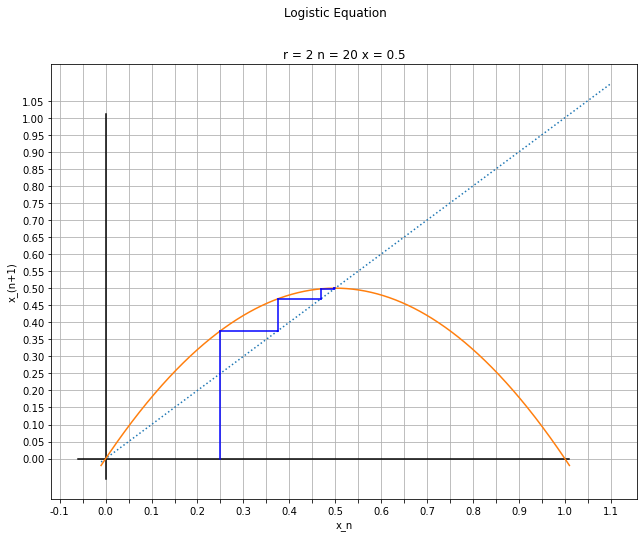

0.5


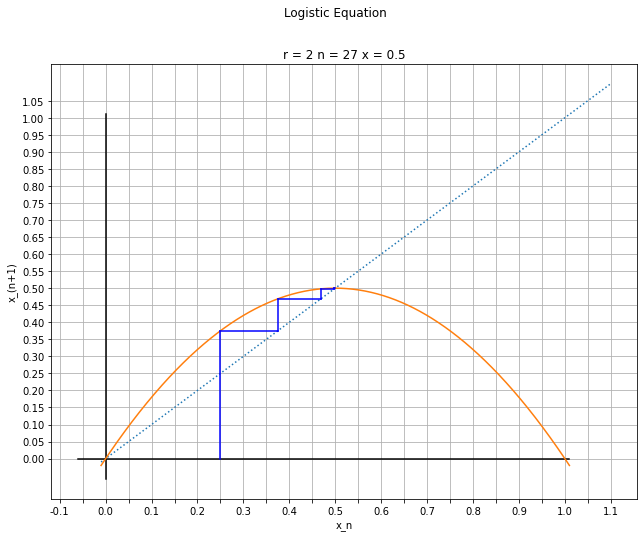

0.5


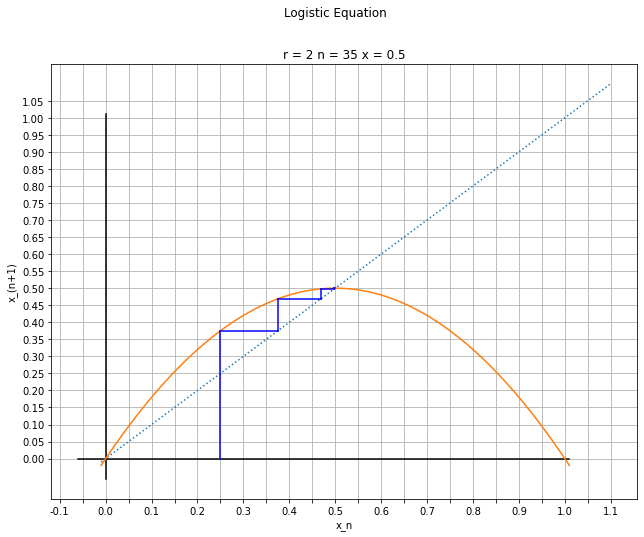

0.5


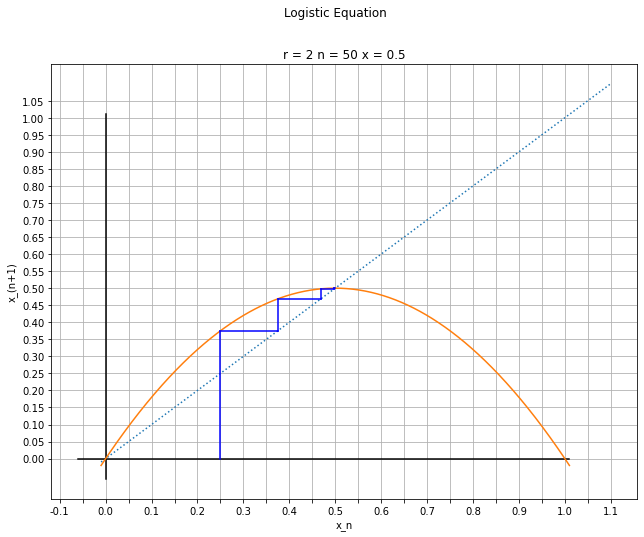

0.5


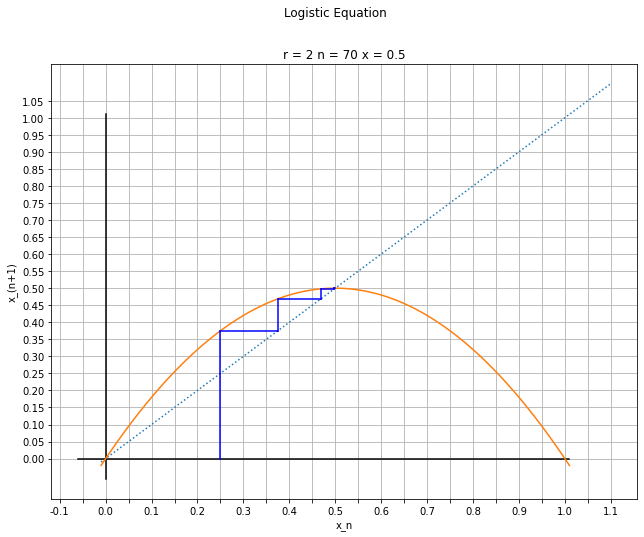

0.5


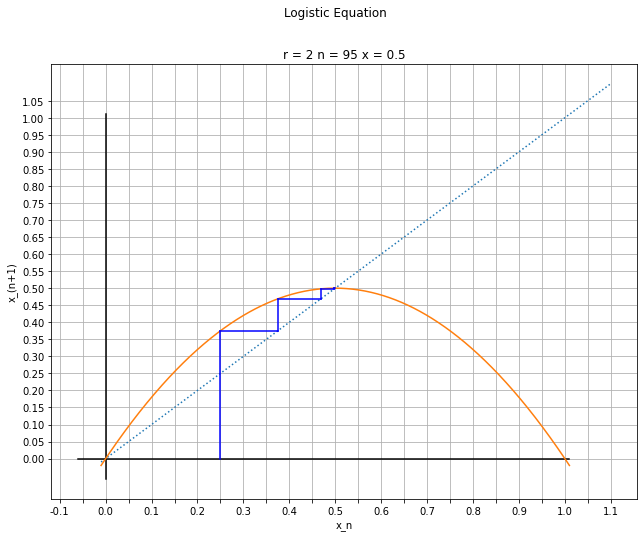

0.5


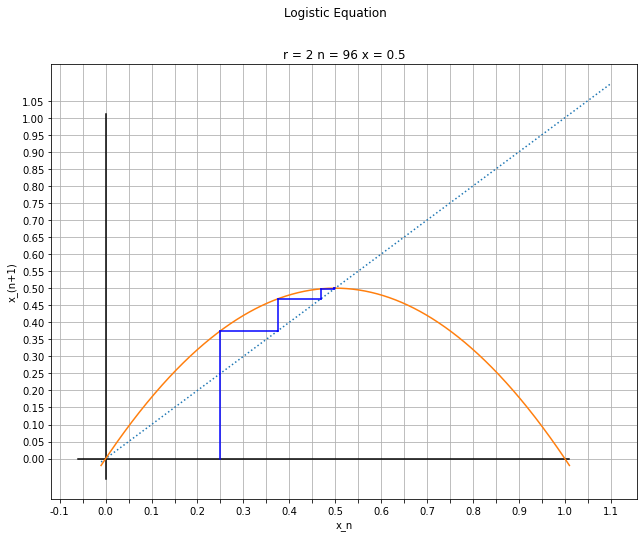

0.5


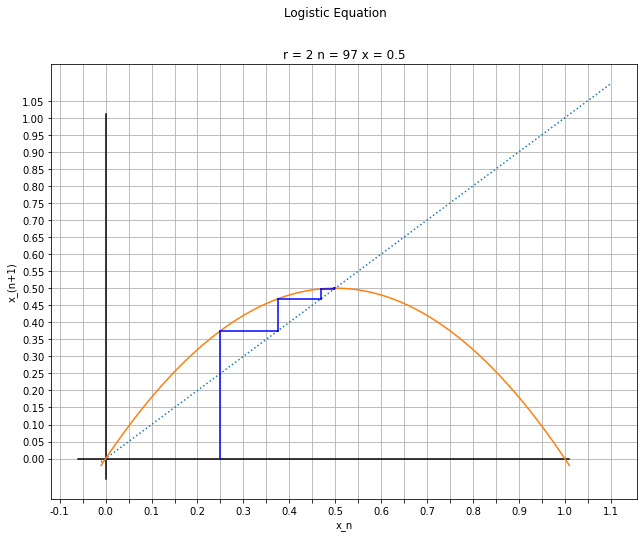

0.5


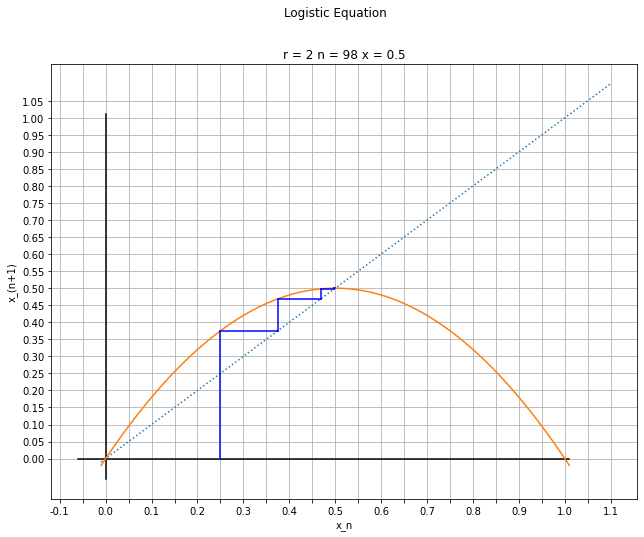

0.5


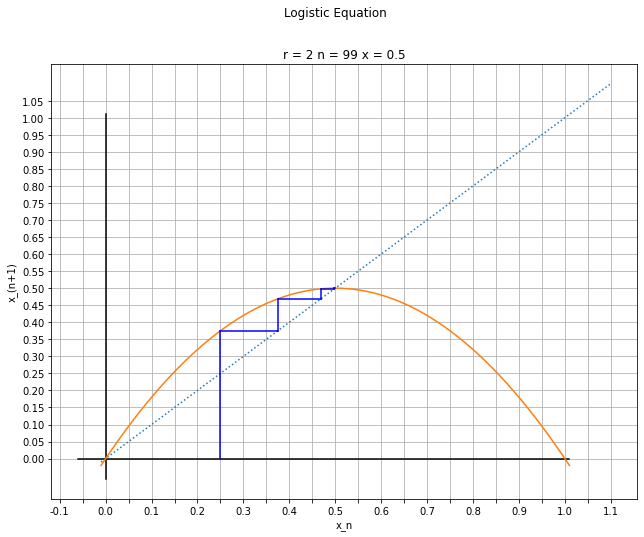

0.5


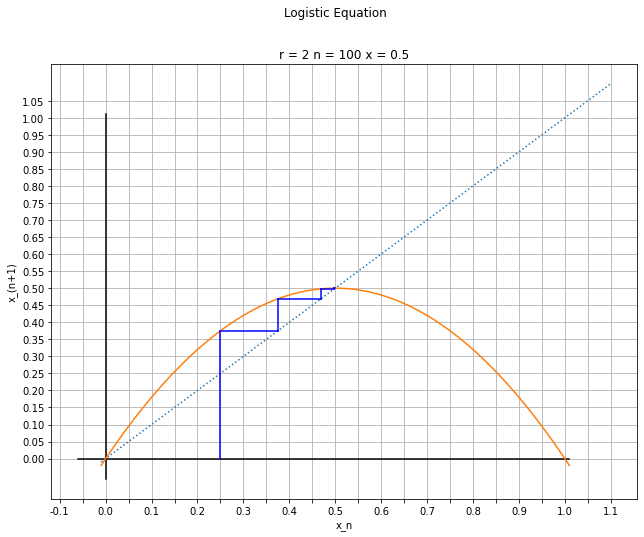

0.25


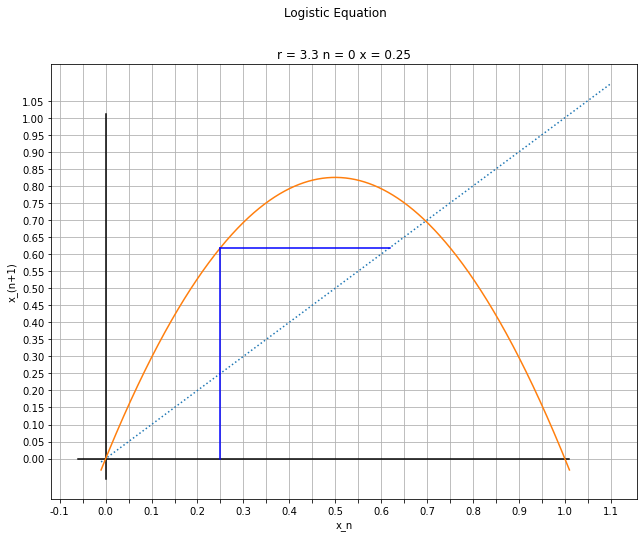

0.77846484375


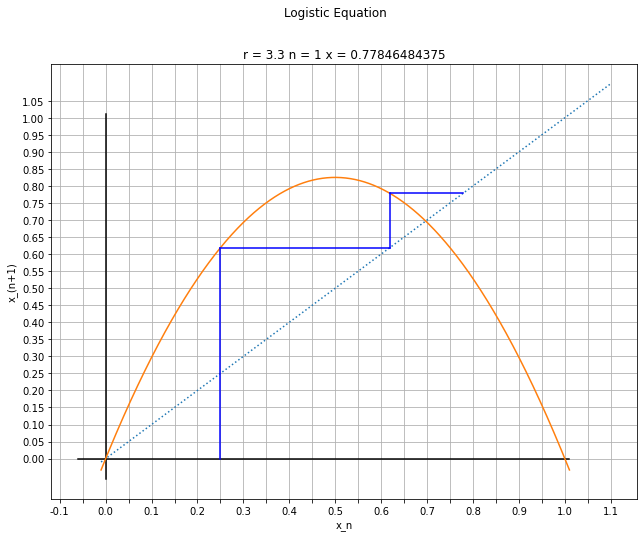

0.5691091916244506


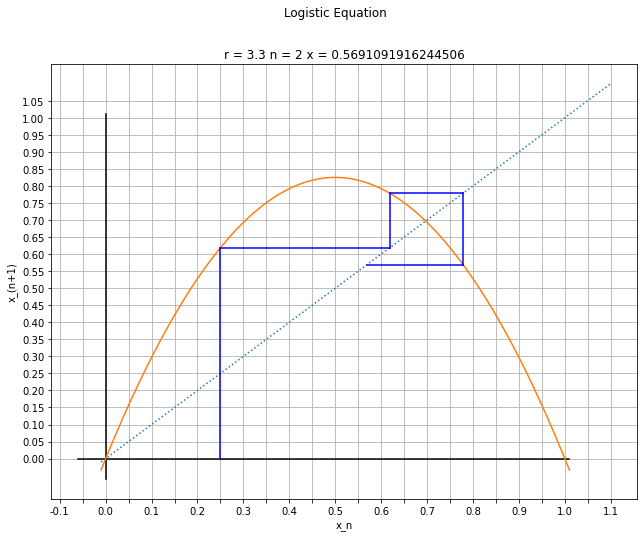

0.8092389347889494


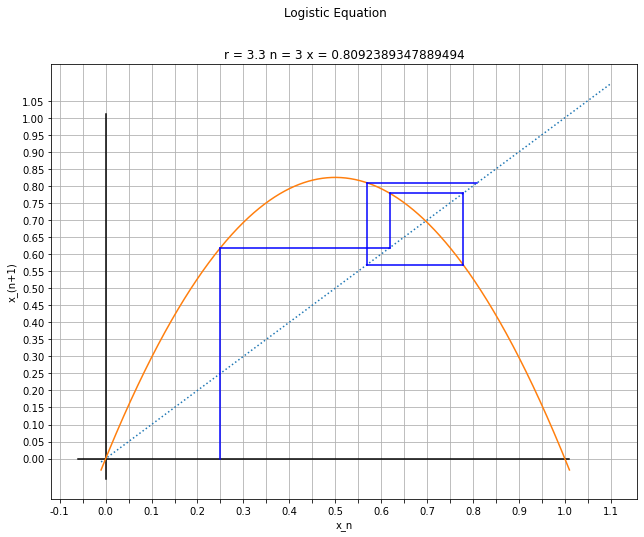

0.5094252279949666


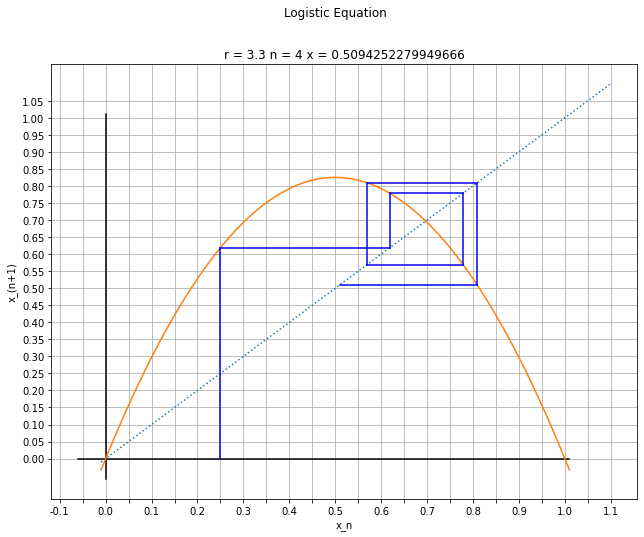

0.8247068447549015


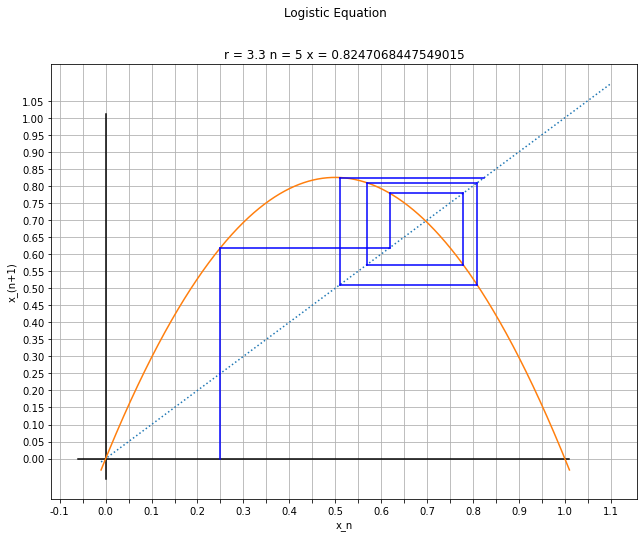

0.8232643096319413


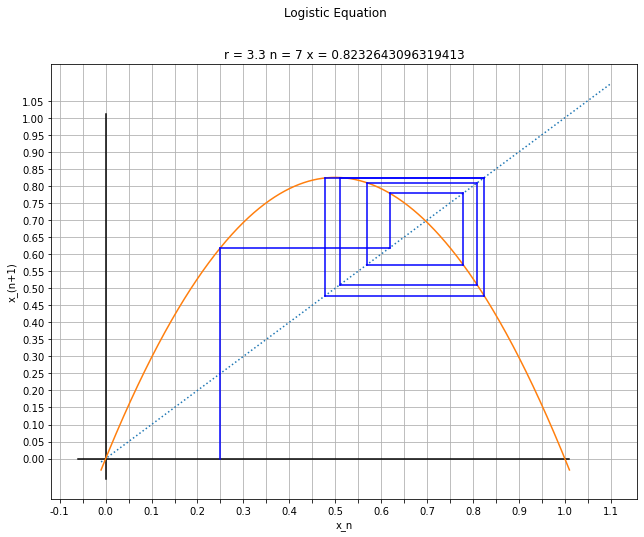

0.479220837008615


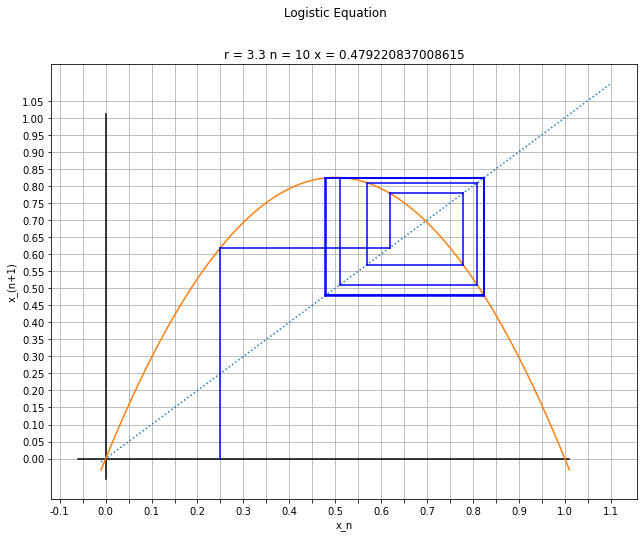

0.47940961894649814


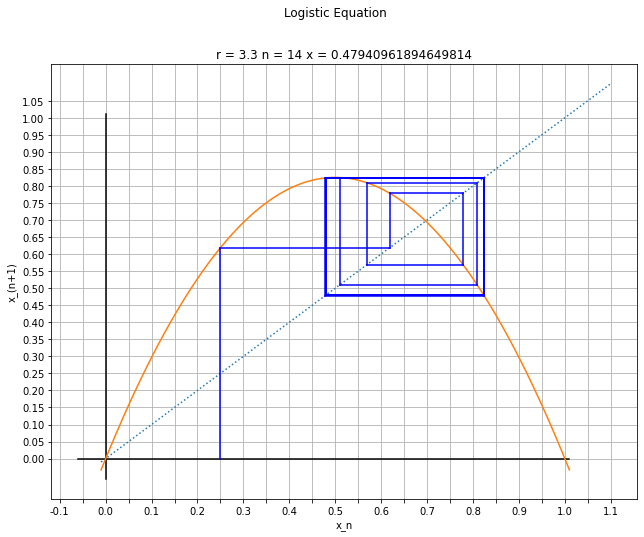

0.4794274443554983


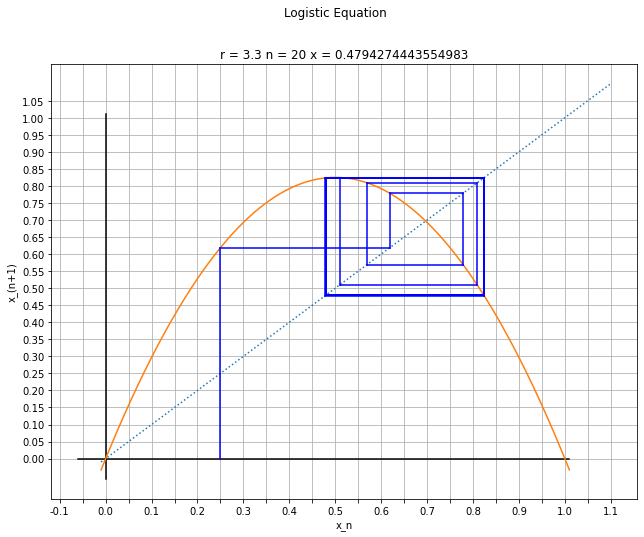

0.823603281800211


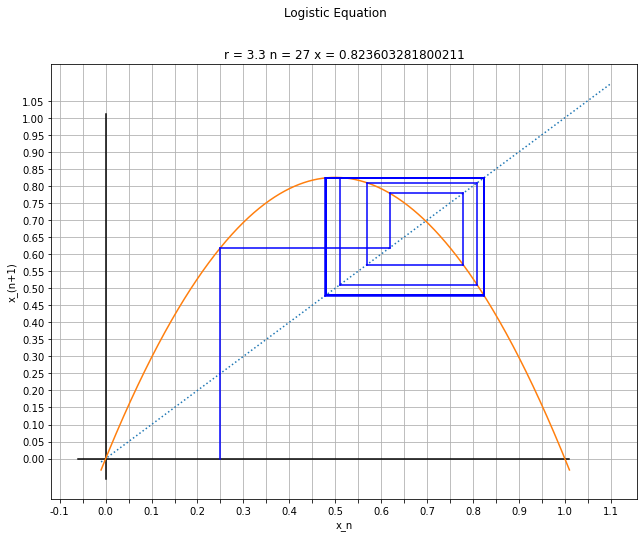

0.8236032831961253


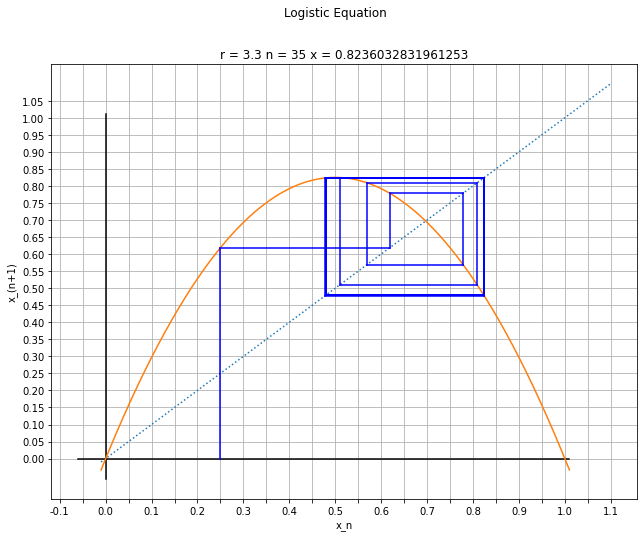

0.4794270198242306


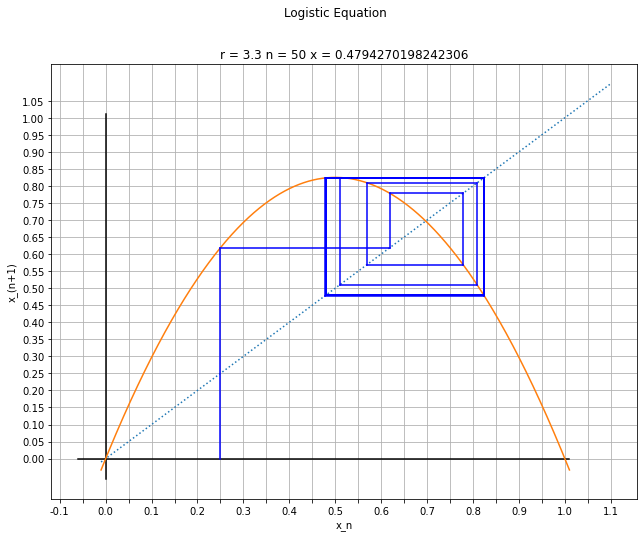

0.47942701982423386


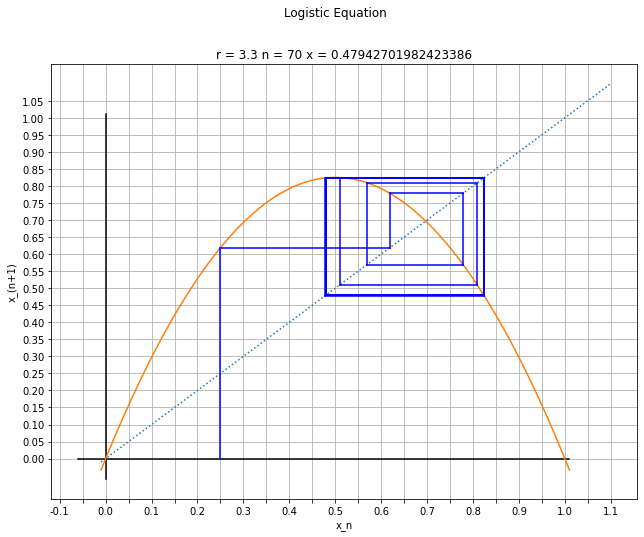

0.8236032832060688


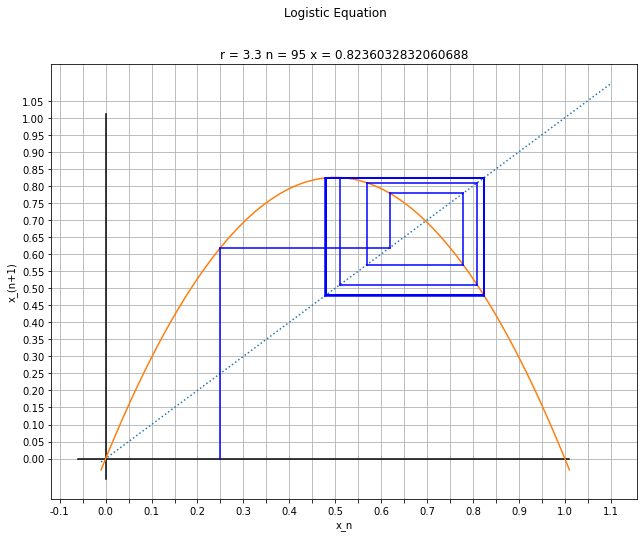

0.4794270198242343


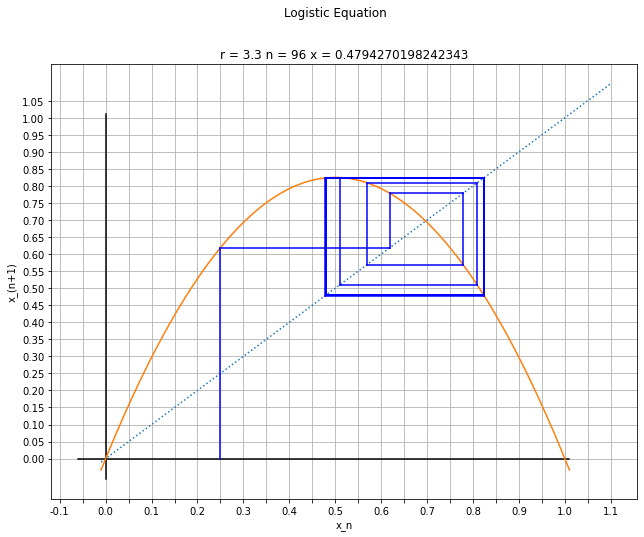

0.8236032832060689


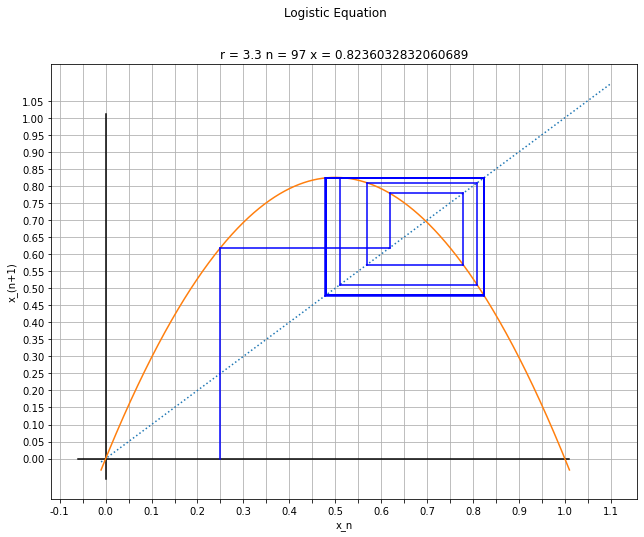

0.479427019824234


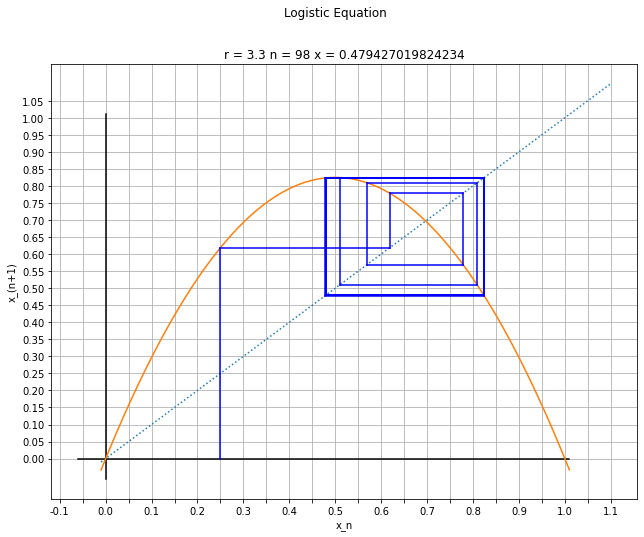

0.8236032832060687


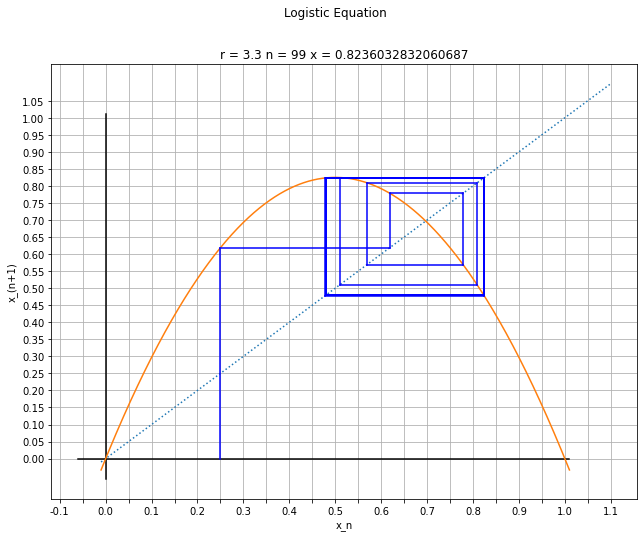

0.4794270198242346


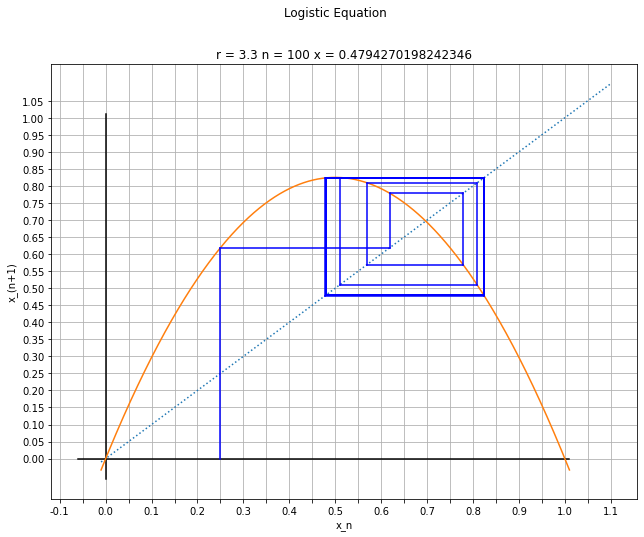

0.25


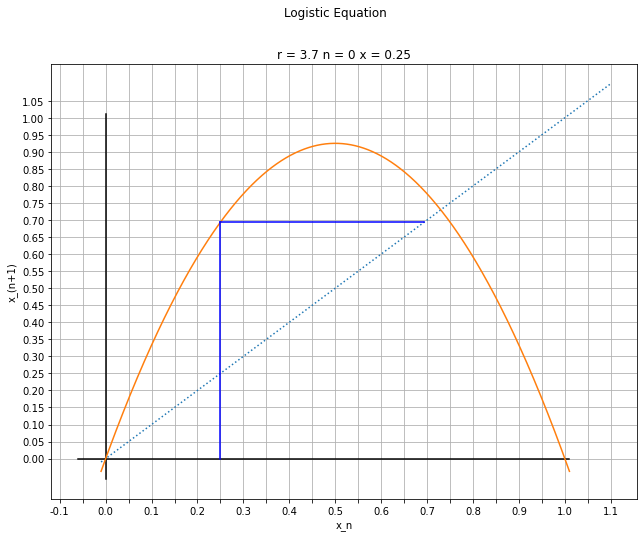

0.78610546875


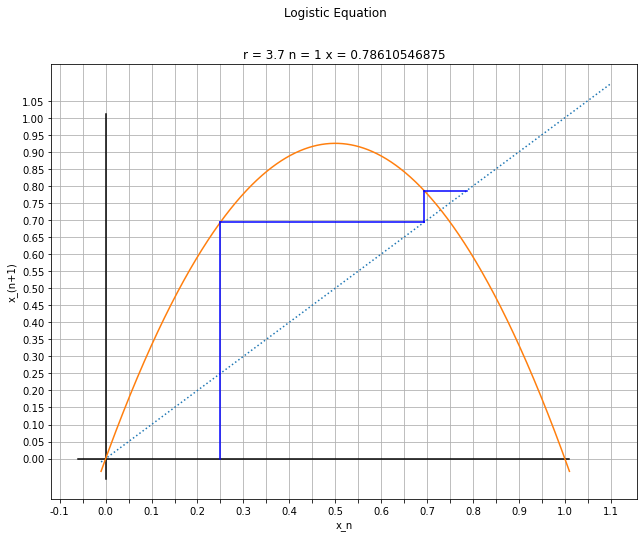

0.6221315447799683


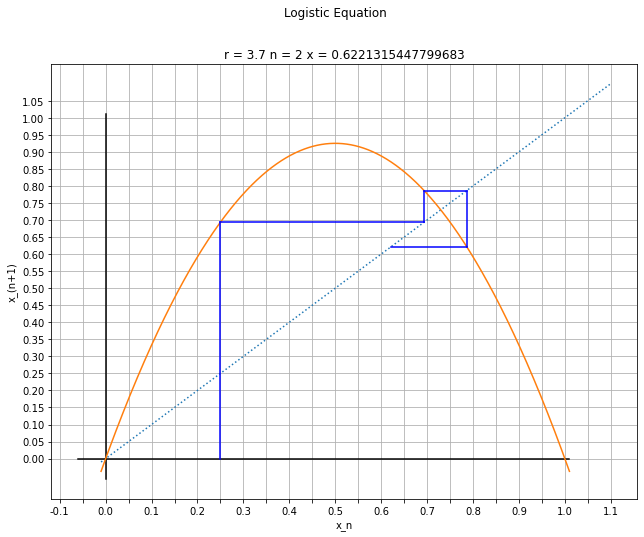

0.8698103773477368


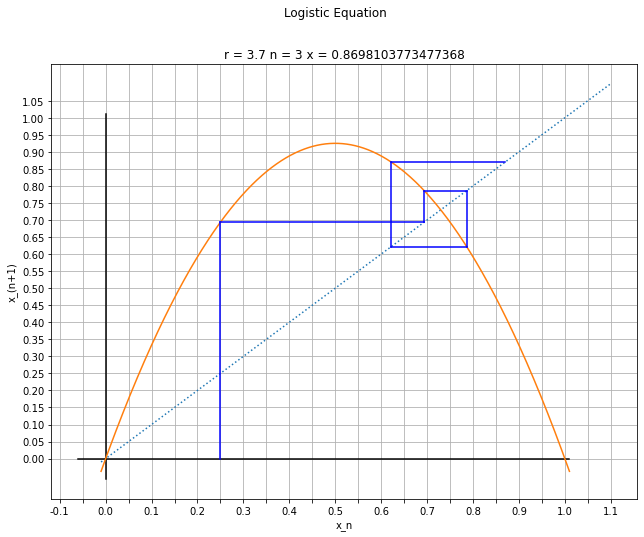

0.41898905378192075


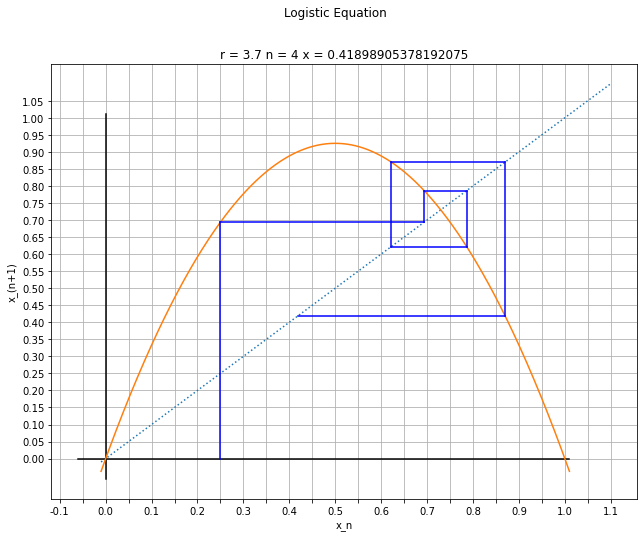

0.9007177383935505


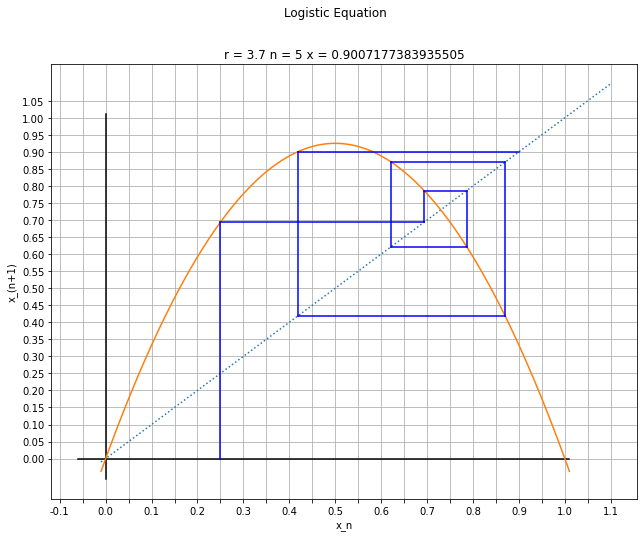

0.8191661504097988


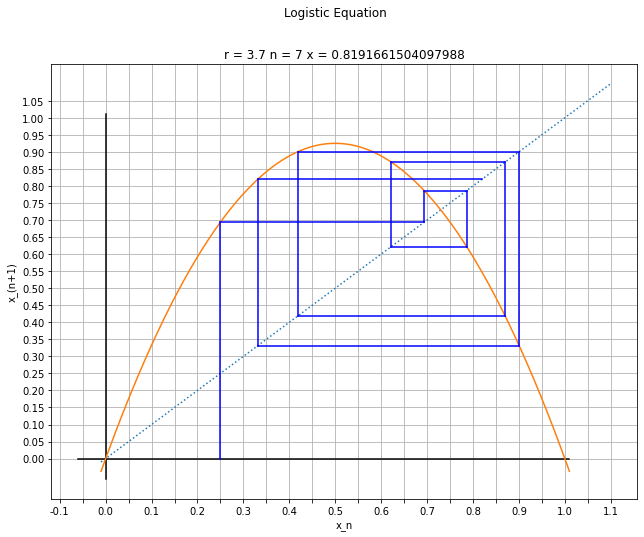

0.28332989503682354


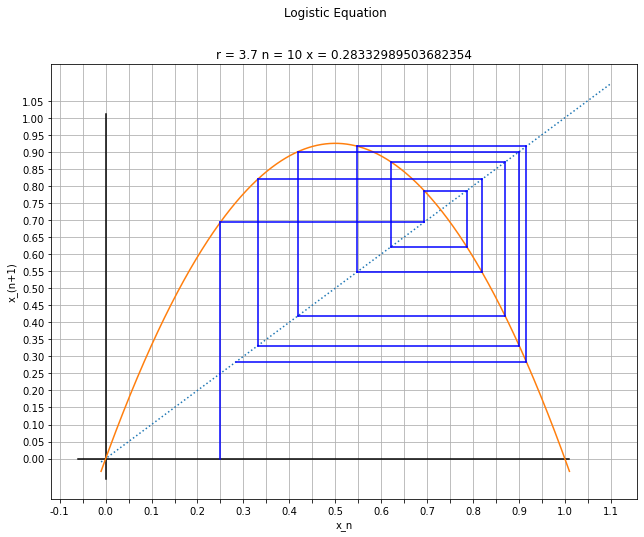

0.6148137994260536


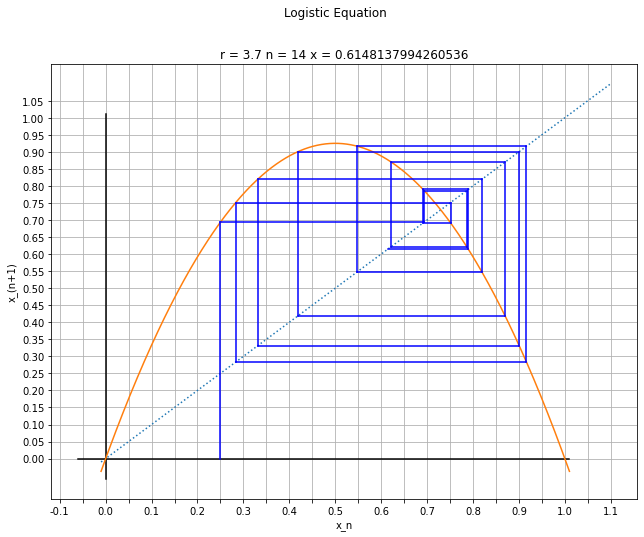

0.45119554431625825


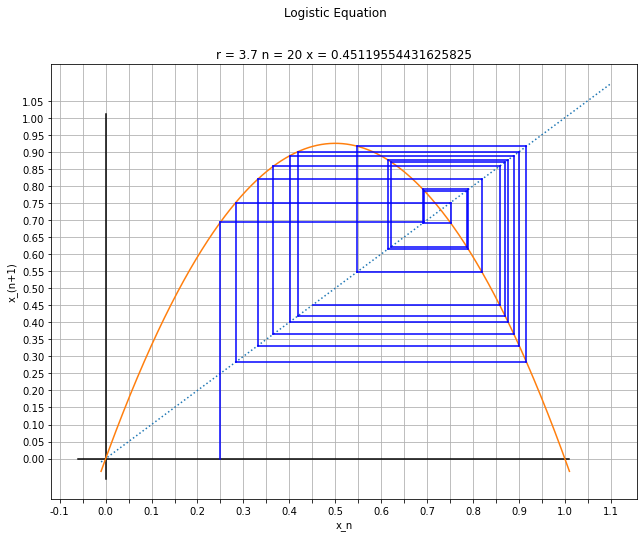

0.8820872855925512


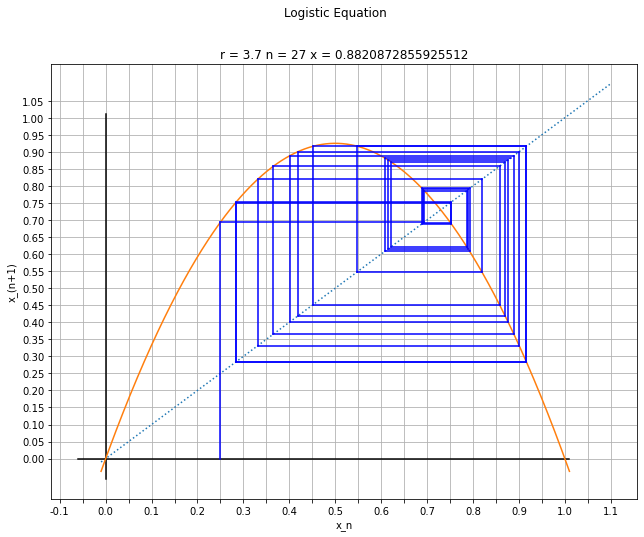

0.9177786907683863


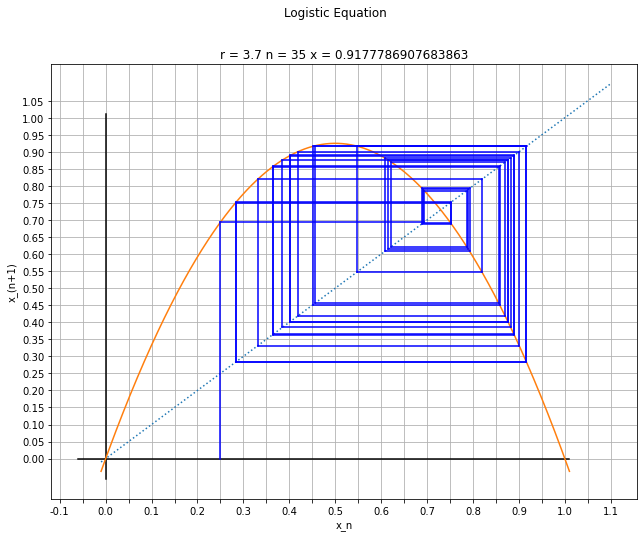

0.9236130243860579


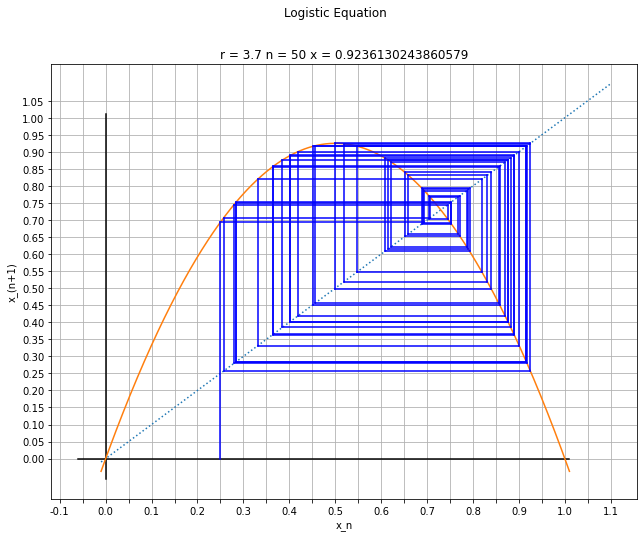

0.7313526297072718


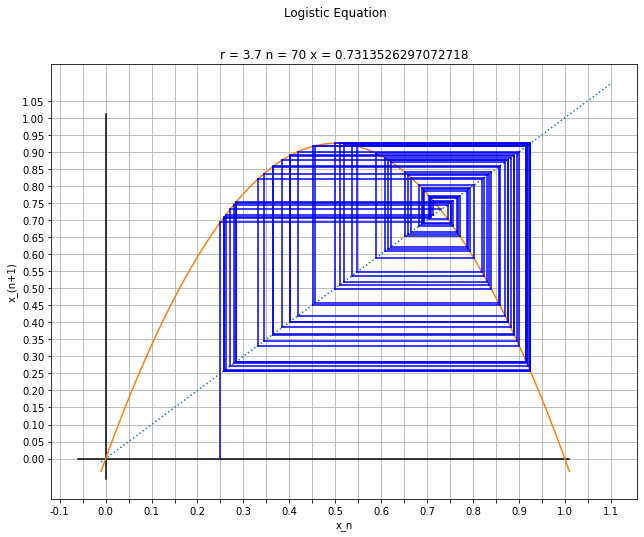

0.9129681852711801


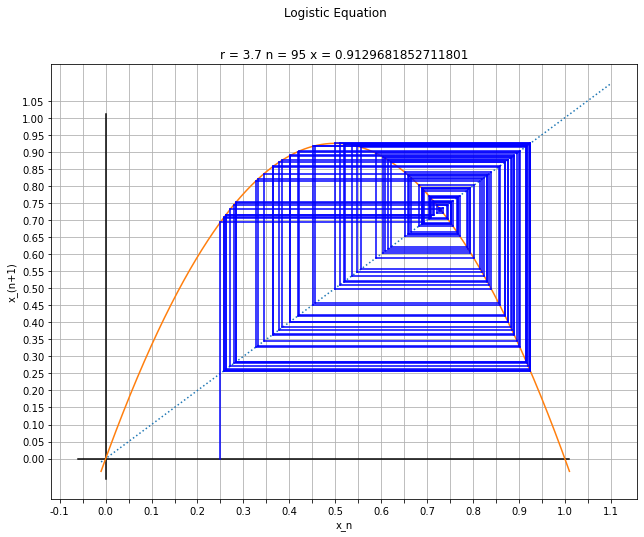

0.2939919284291647


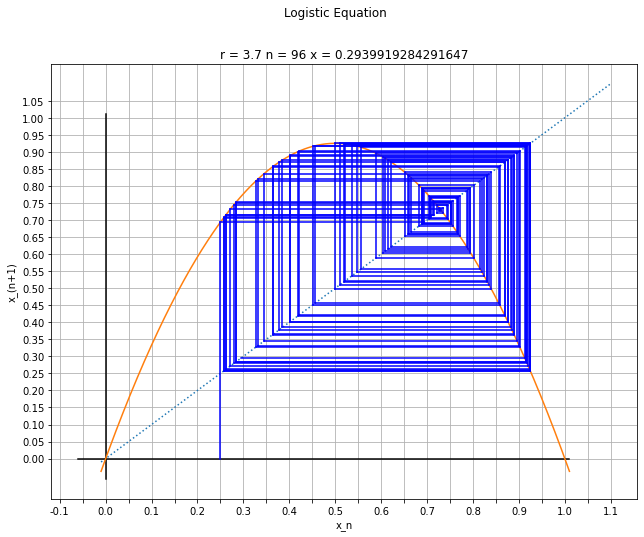

0.7679744954563628


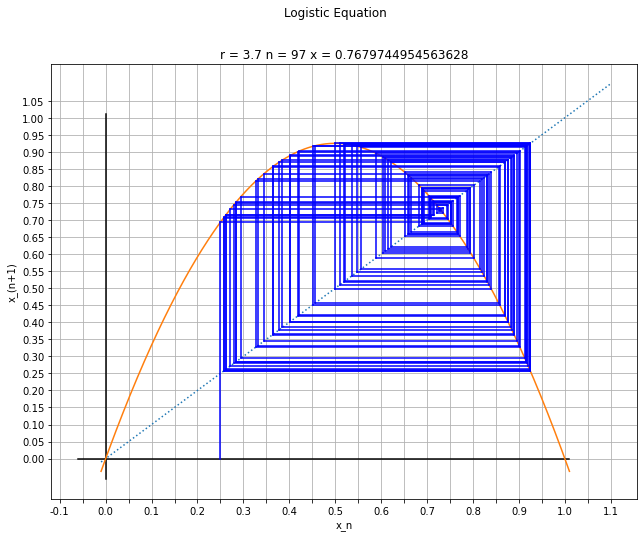

0.659301778204159


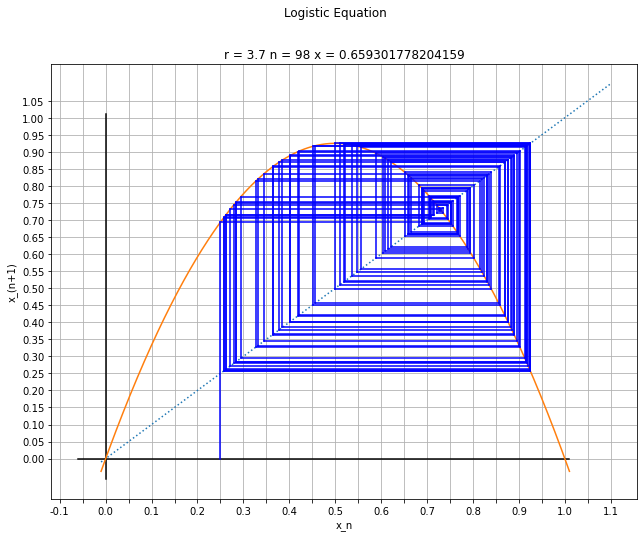

0.8311048908056738


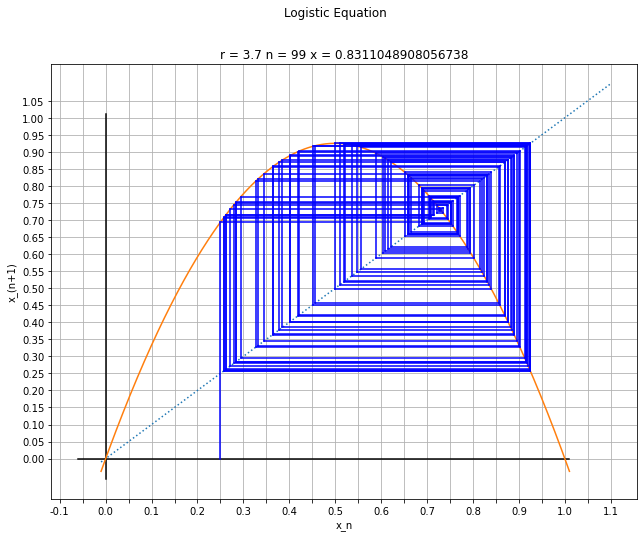

0.5193673397528824


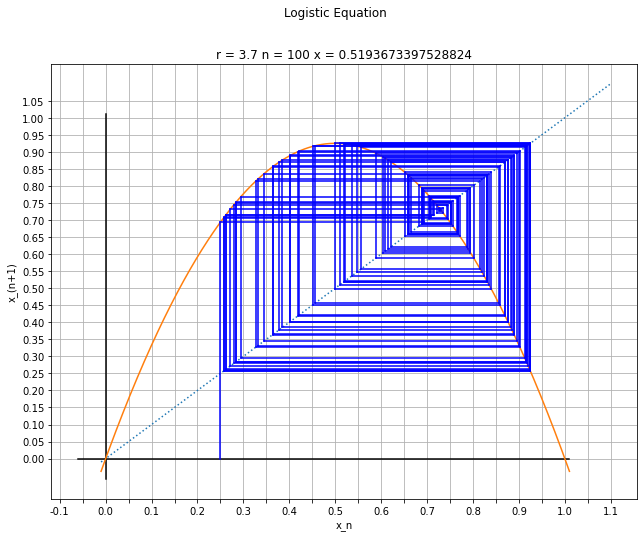

0.25


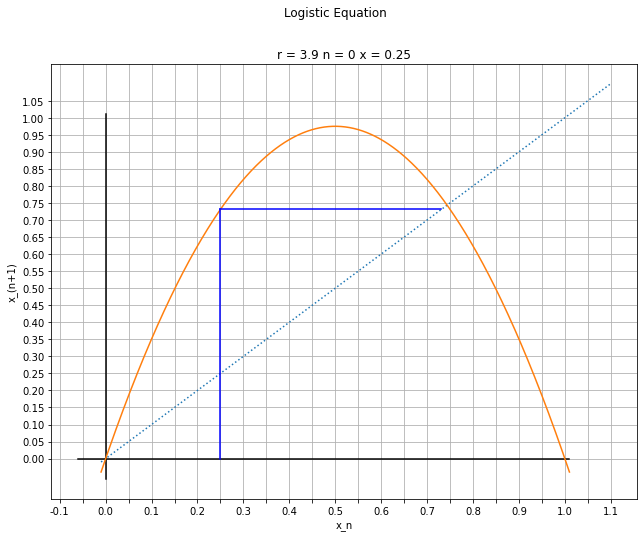

0.76644140625


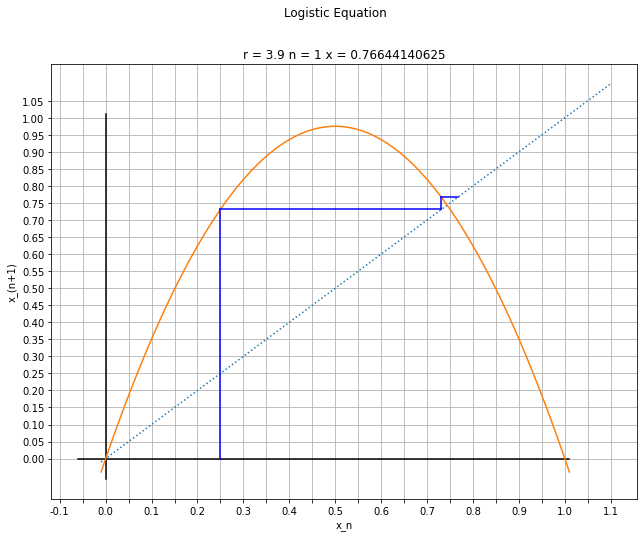

0.6981350104385375


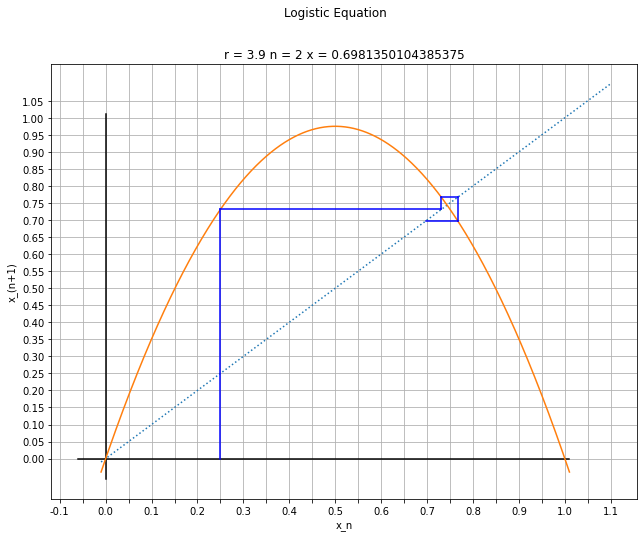

0.8218958187902304


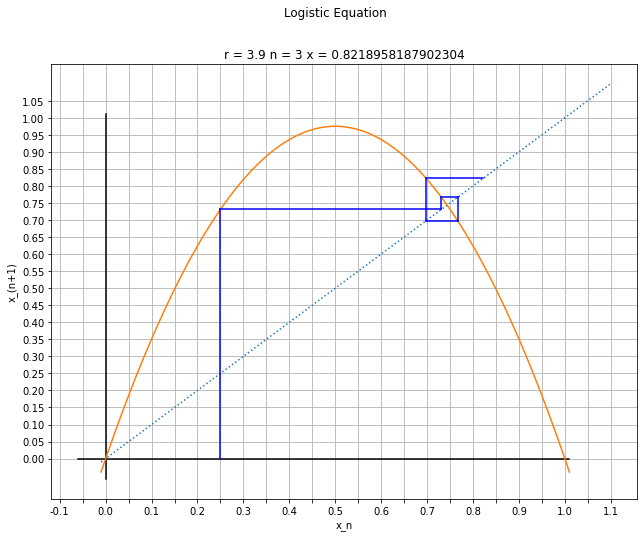

0.5708940191969318


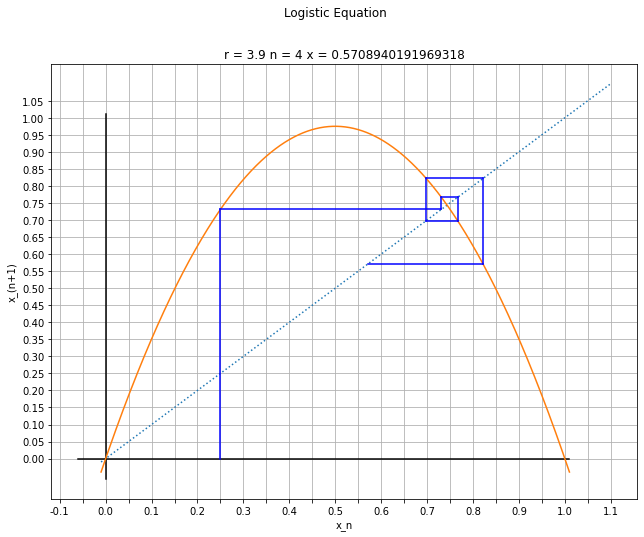

0.9553987483642097


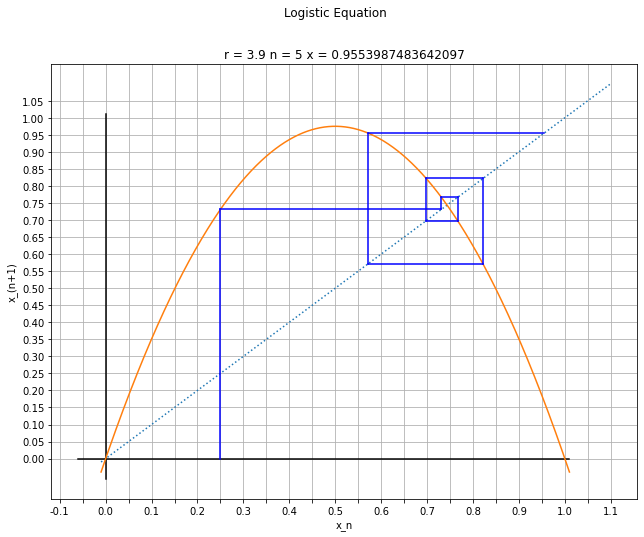

0.5404179120617947


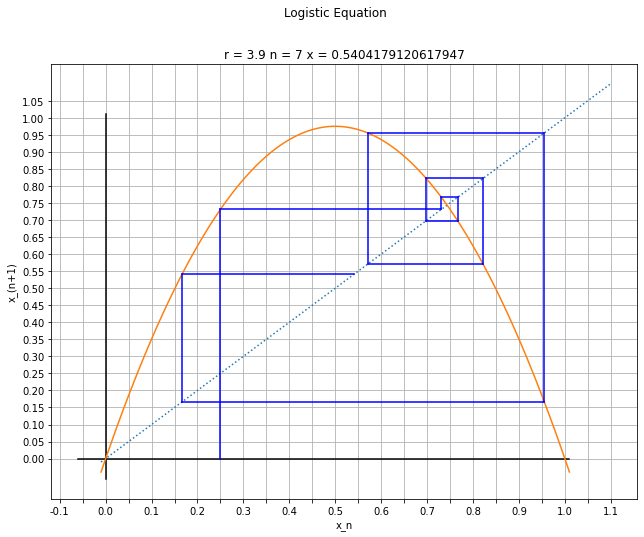

0.4074120362630396


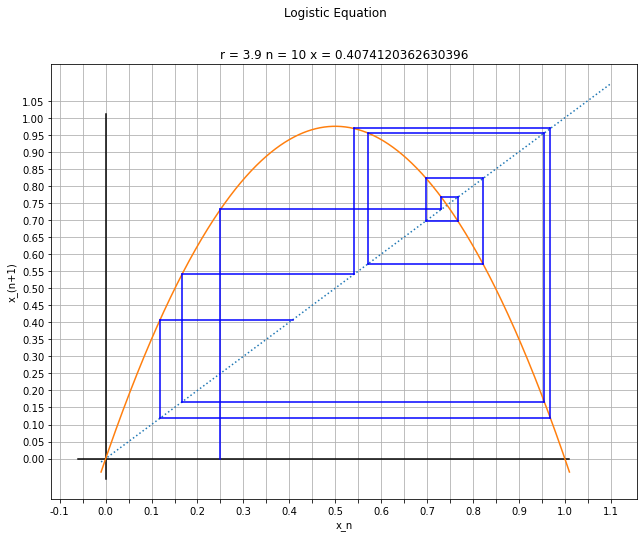

0.8785374581724367


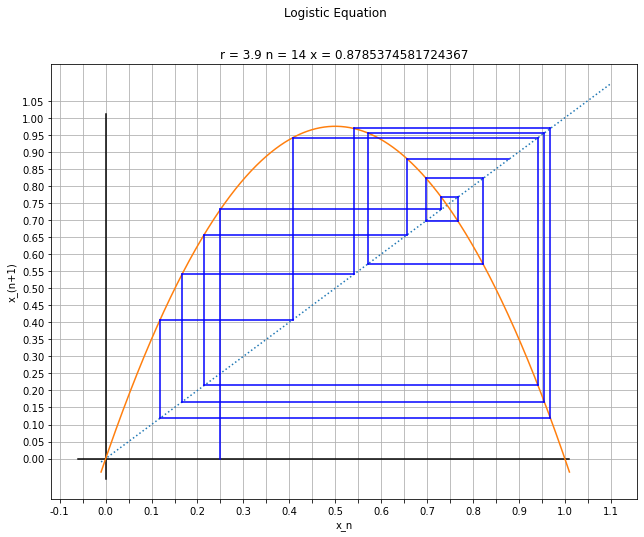

0.2585491862527702


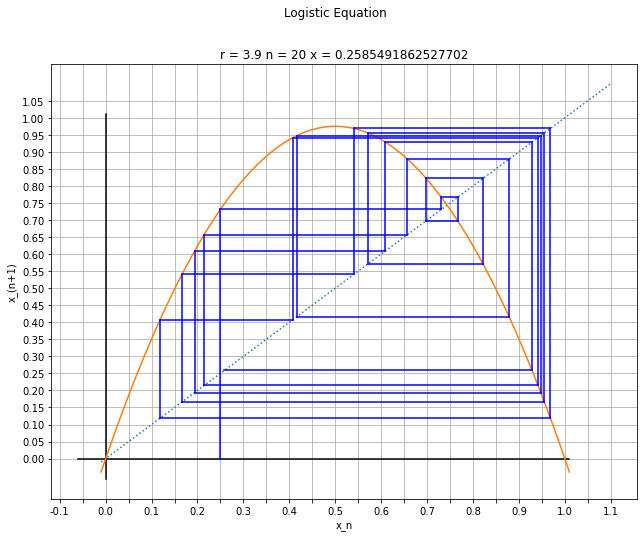

0.9016529077435309


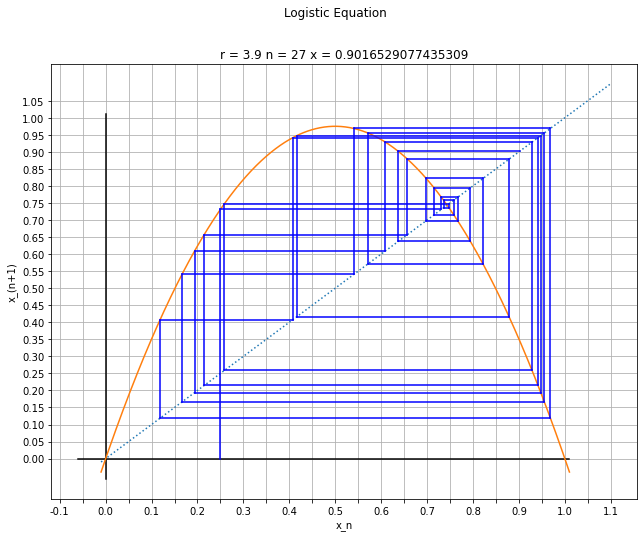

0.4658034106864599


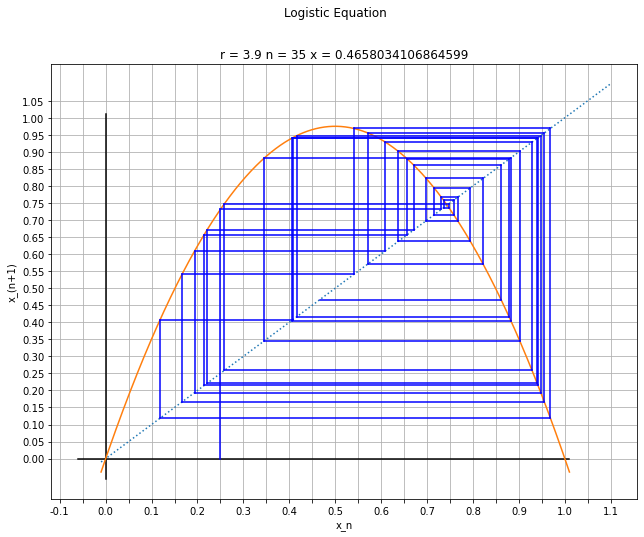

0.5185673216295427


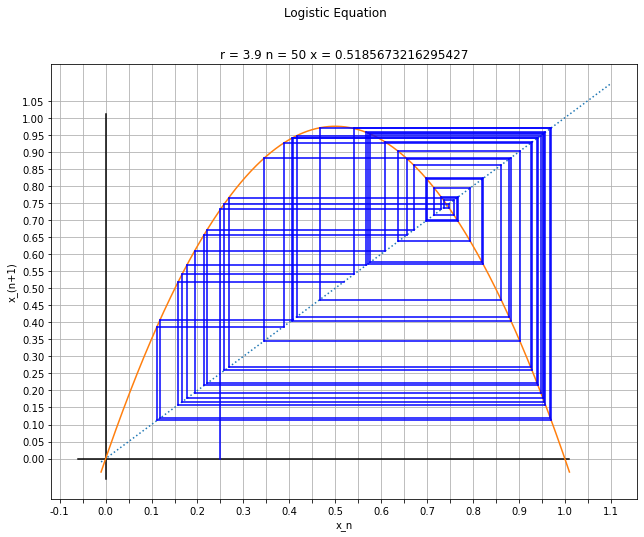

0.5318980581961564


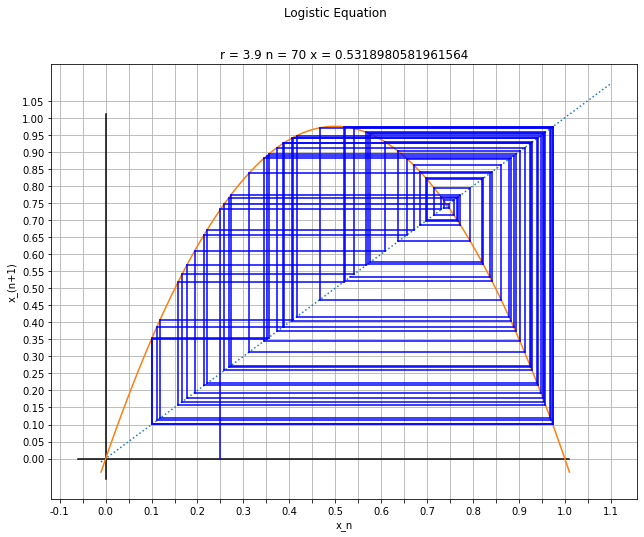

0.3902074108457734


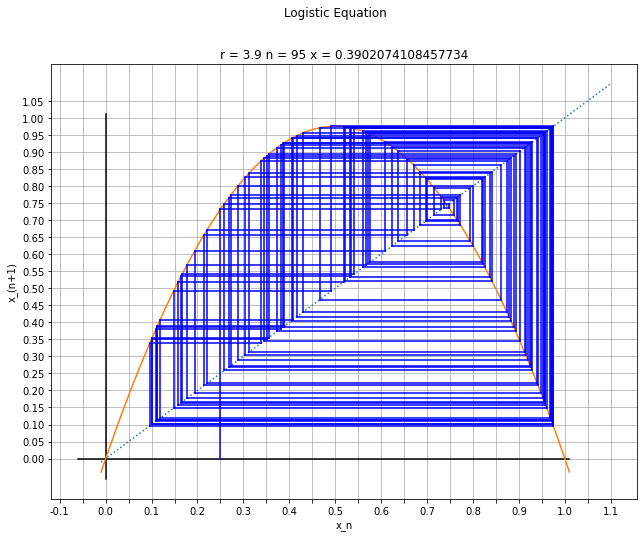

0.9279877907305637


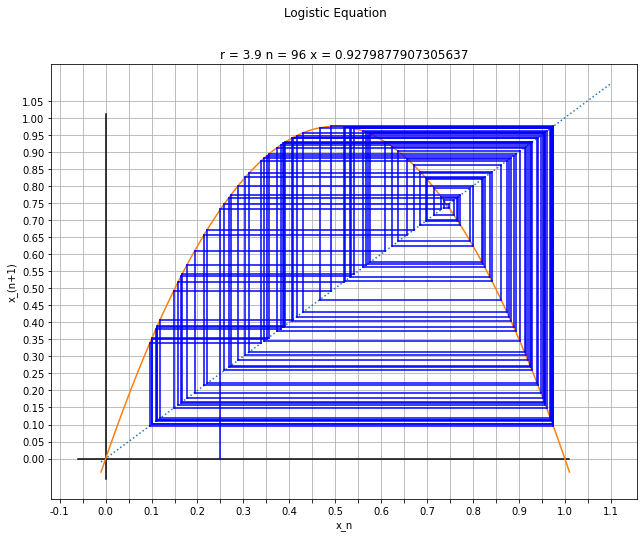

0.2606231588437277


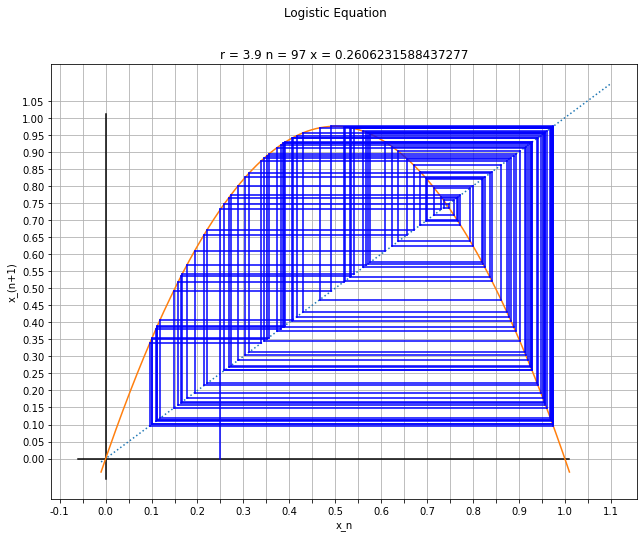

0.7515250388803746


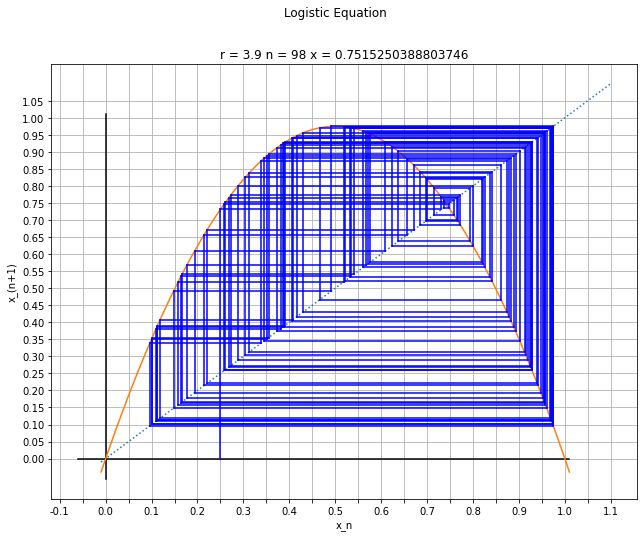

0.7282671037832815


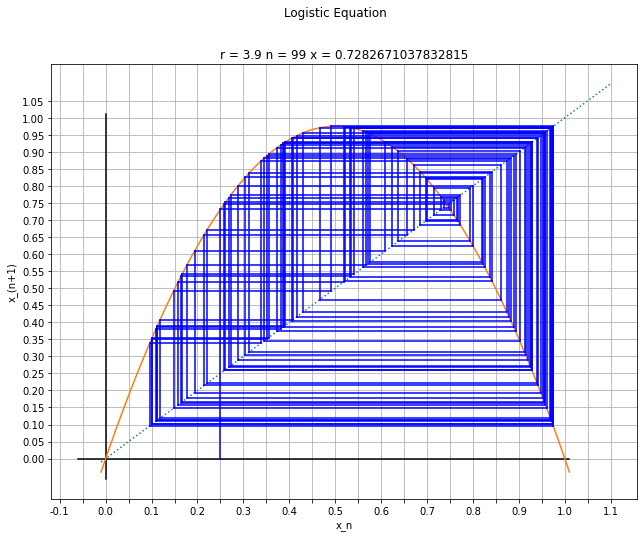

0.771787104388531


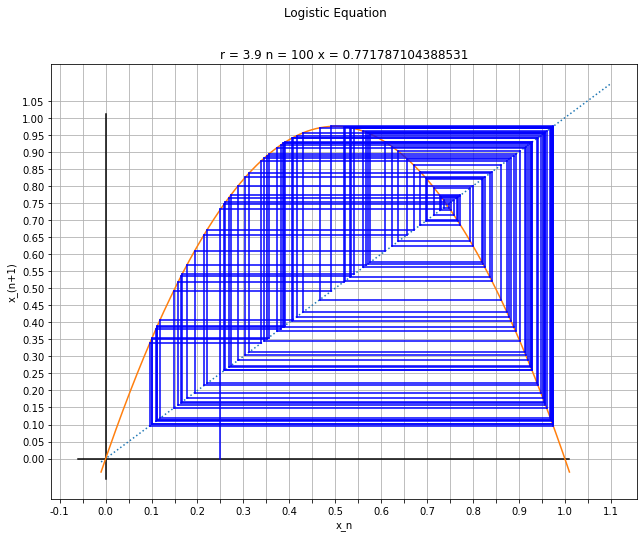

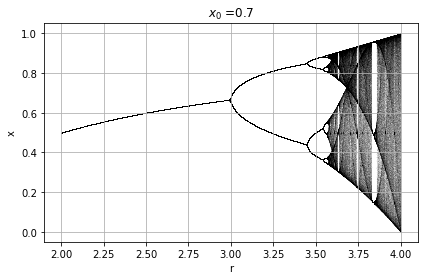

0.7


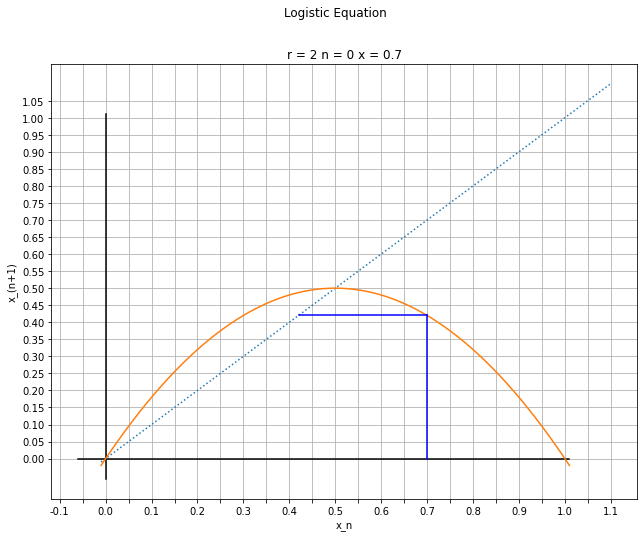

0.4872


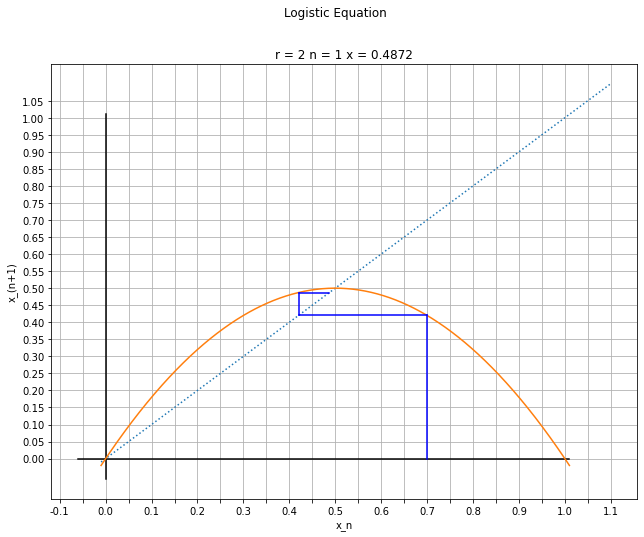

0.49967231999999995


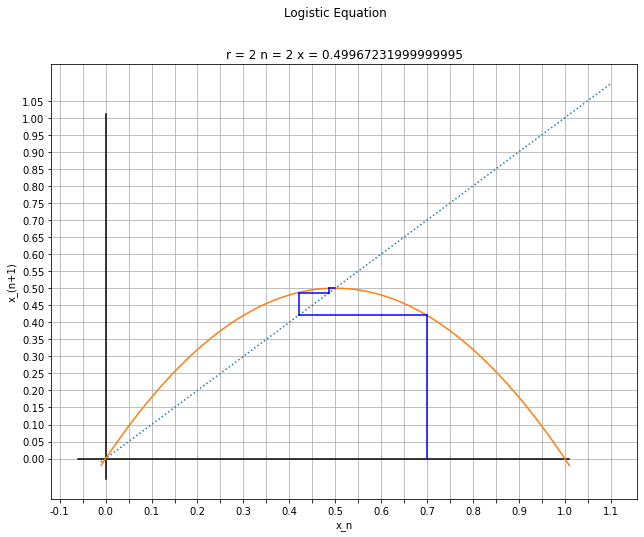

0.4999997852516352


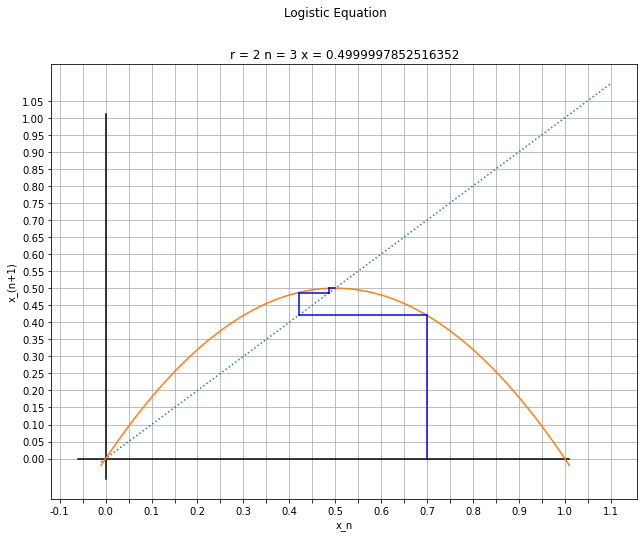

0.4999999999999078


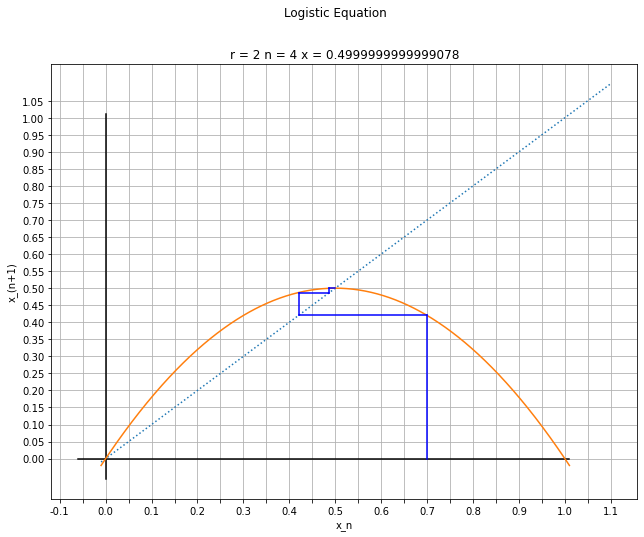

0.49999999999999994


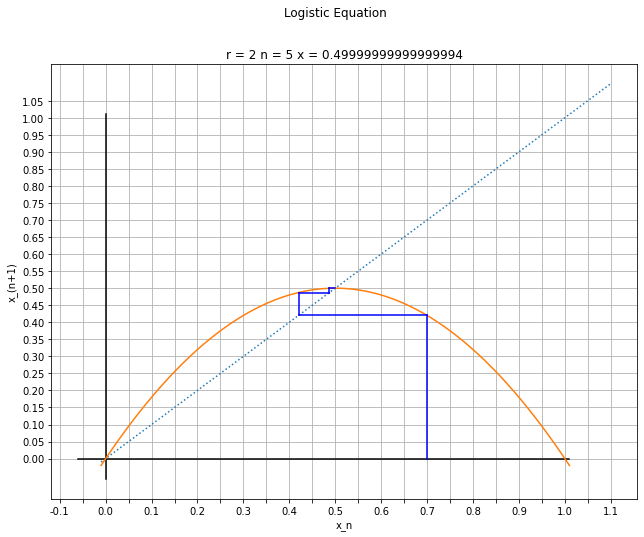

0.49999999999999994


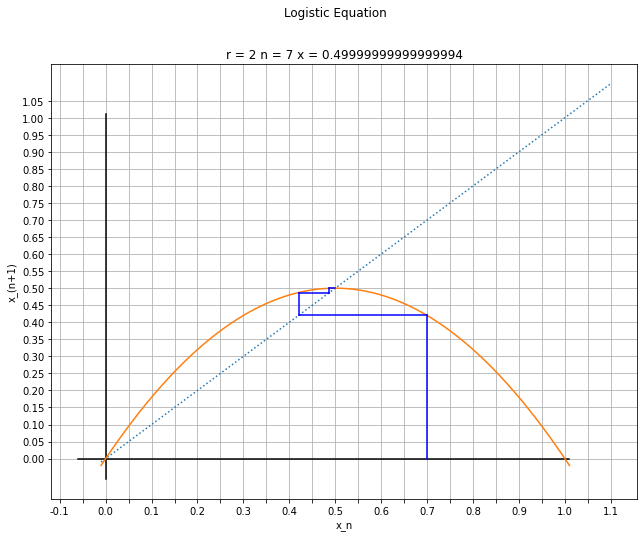

0.49999999999999994


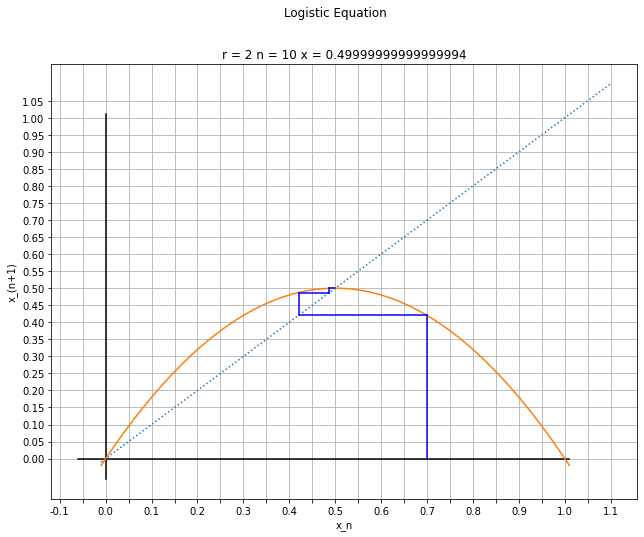

0.49999999999999994


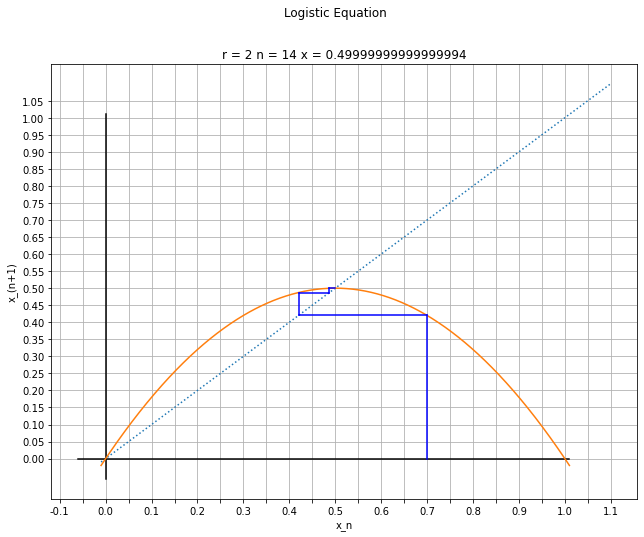

0.49999999999999994


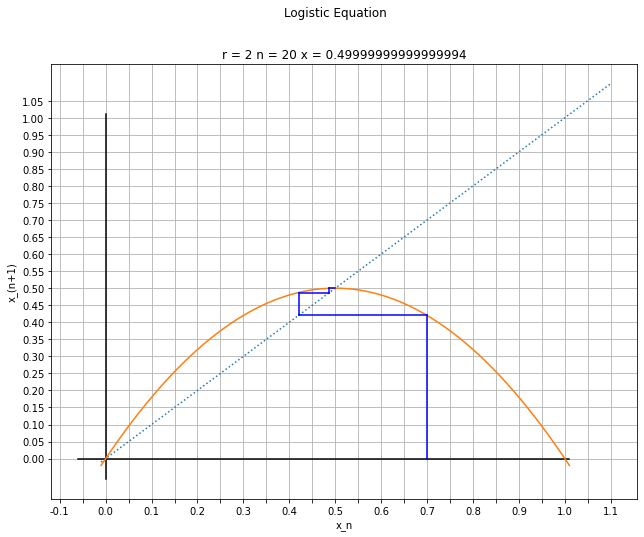

0.49999999999999994


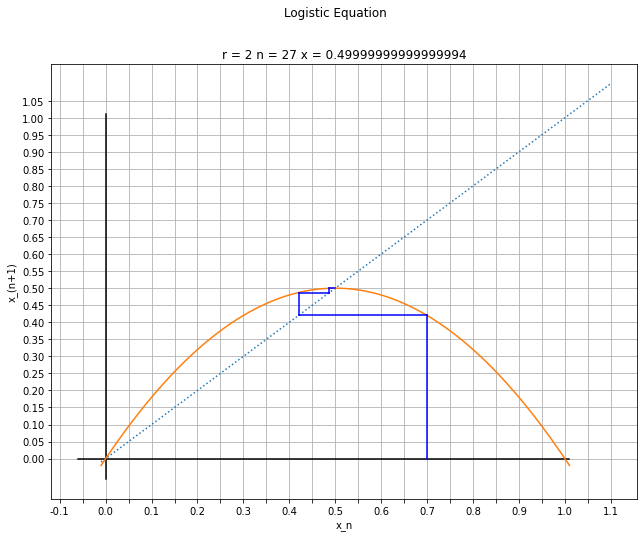

0.49999999999999994


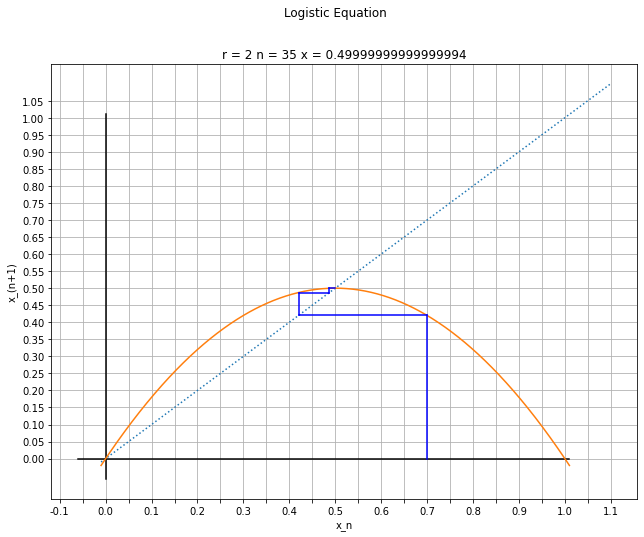

0.49999999999999994


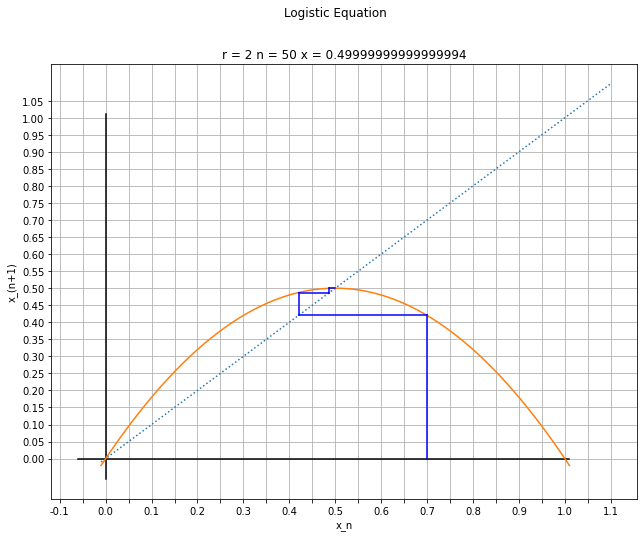

0.49999999999999994


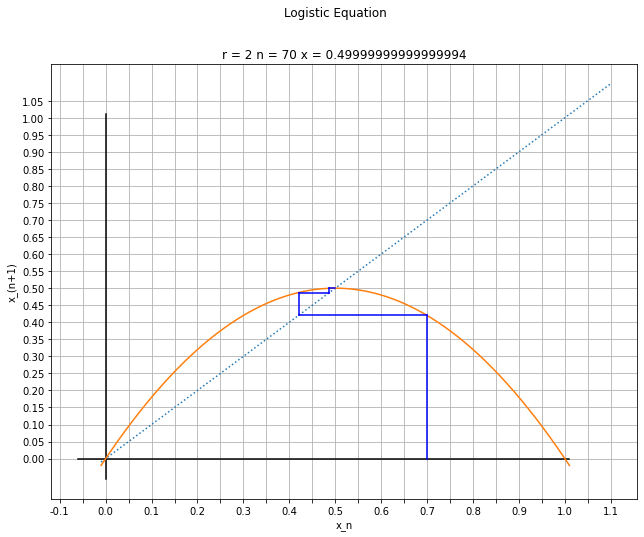

0.49999999999999994


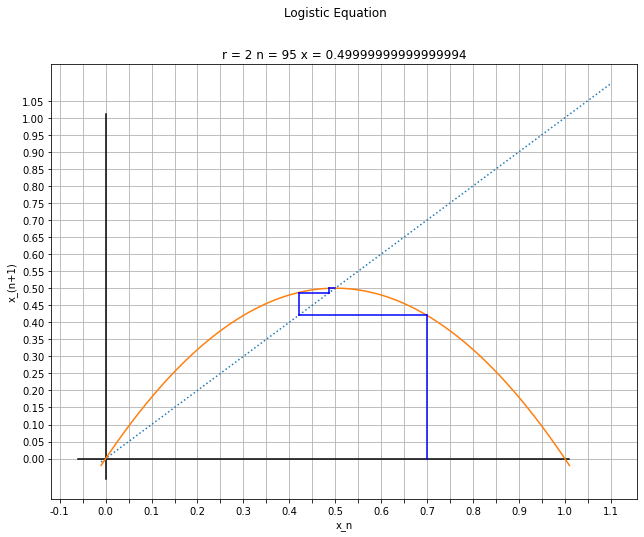

0.49999999999999994


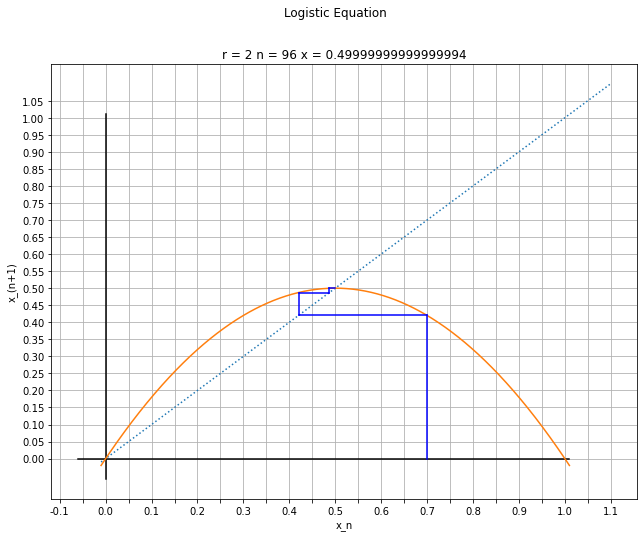

0.49999999999999994


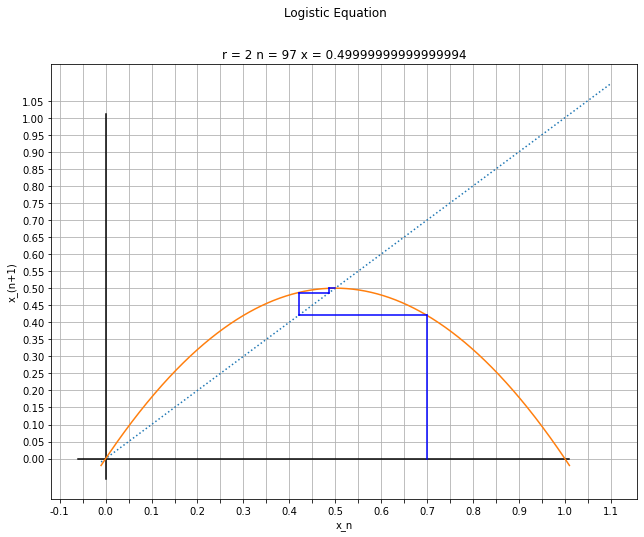

0.49999999999999994


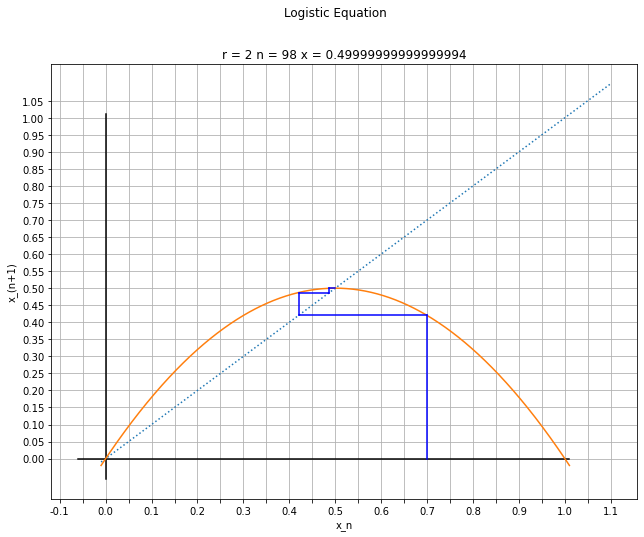

0.49999999999999994


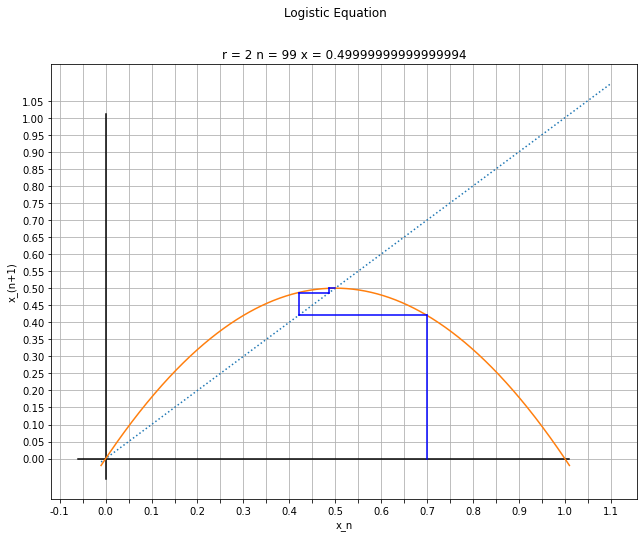

0.49999999999999994


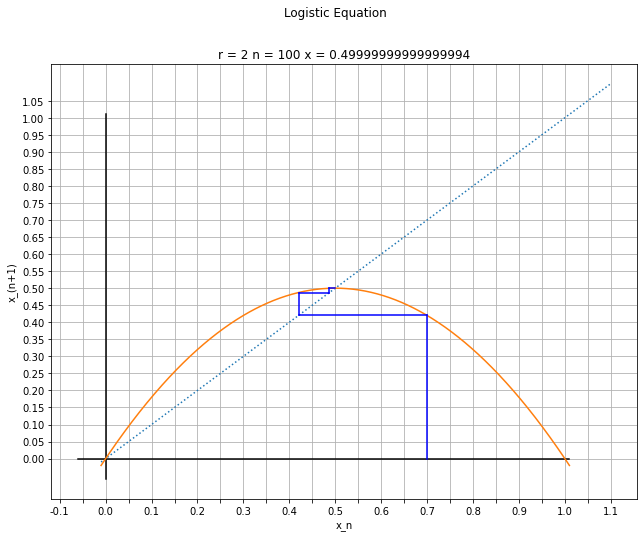

0.7


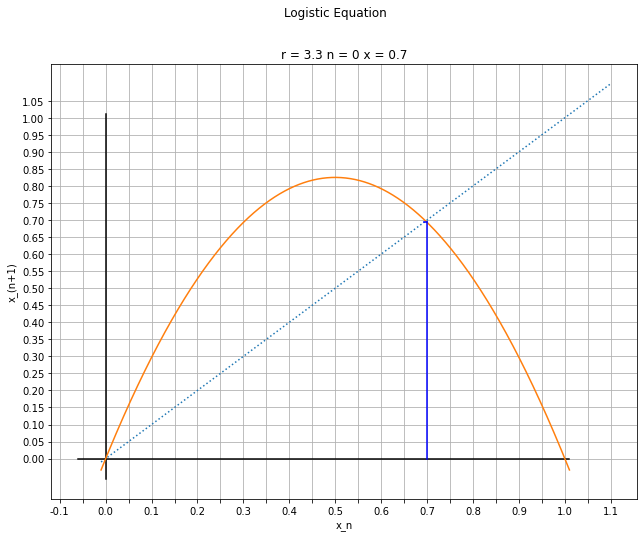

0.7020782999999998


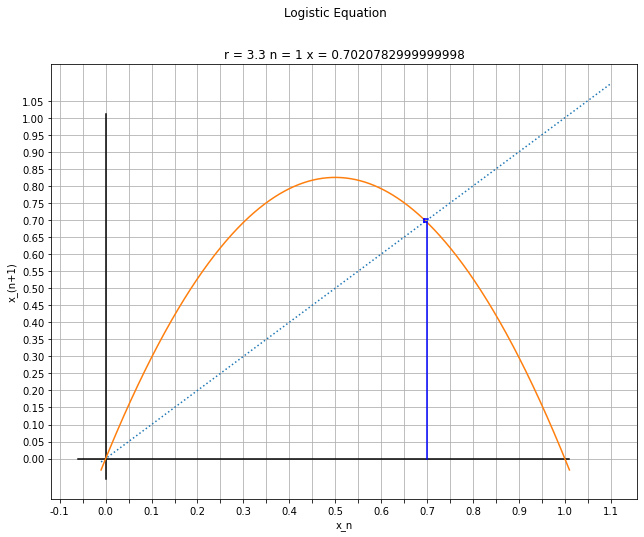

0.6902423902080632


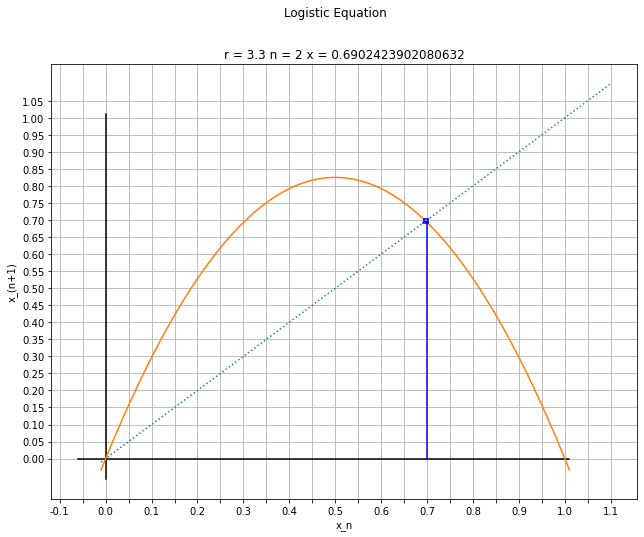

0.705565848794146


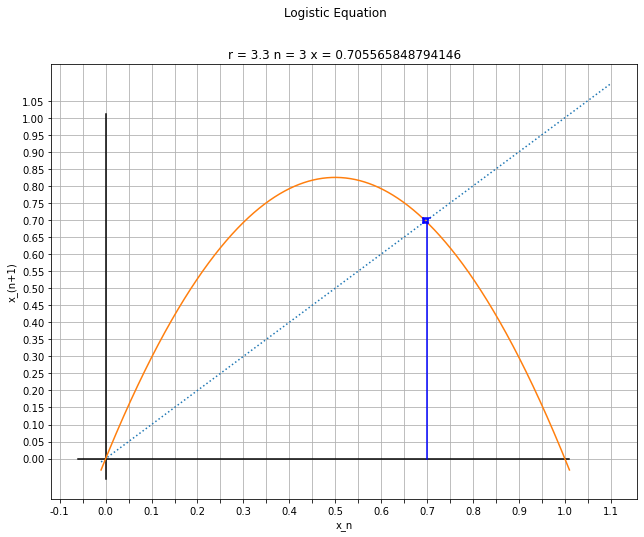

0.6855508499714896


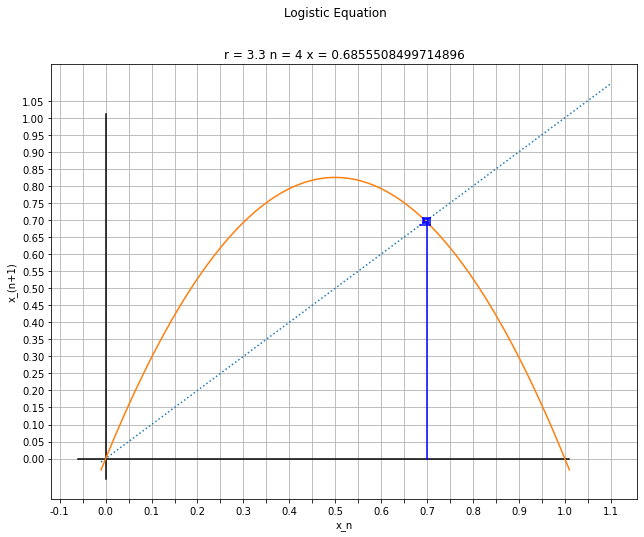

0.7113839108470306


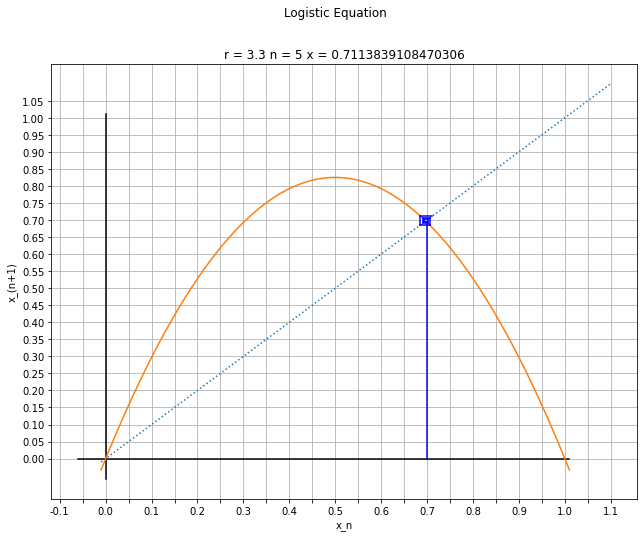

0.7209759719058629


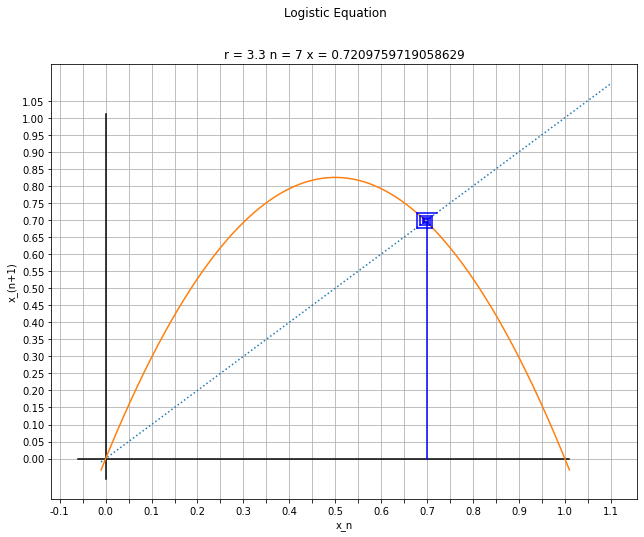

0.640587516456284


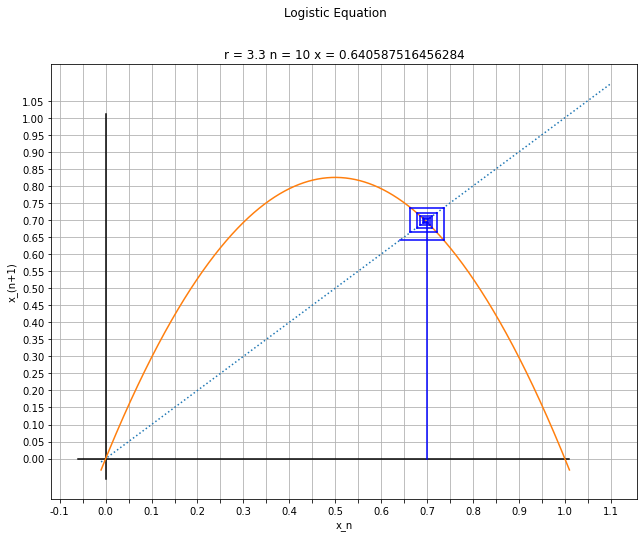

0.5465856223254083


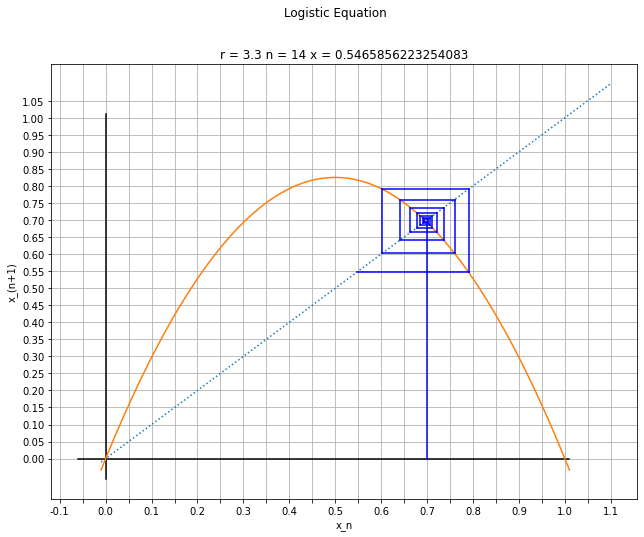

0.4801936335673556


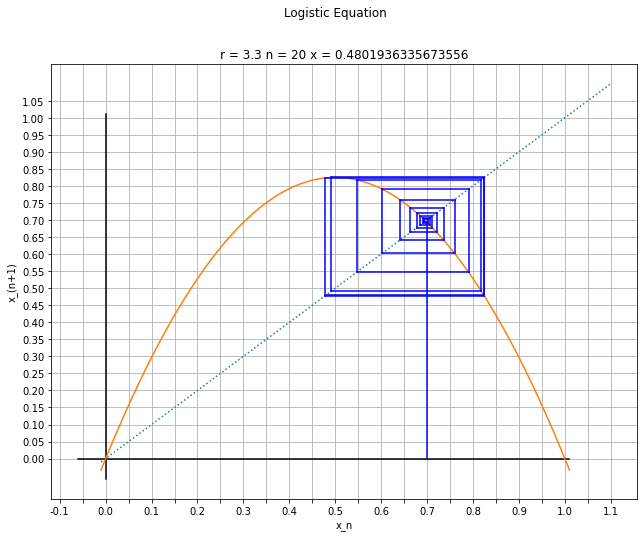

0.8236007810309786


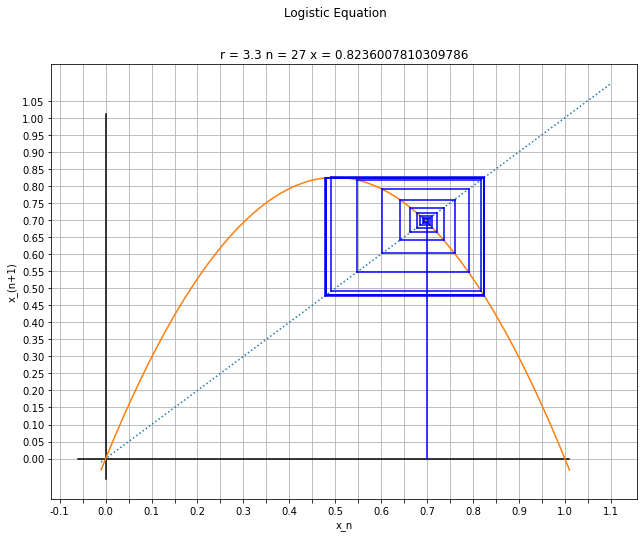

0.823603265510482


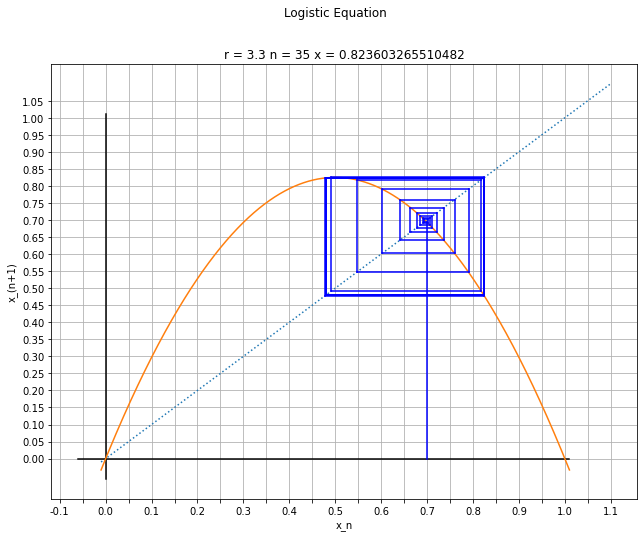

0.47942701981771496


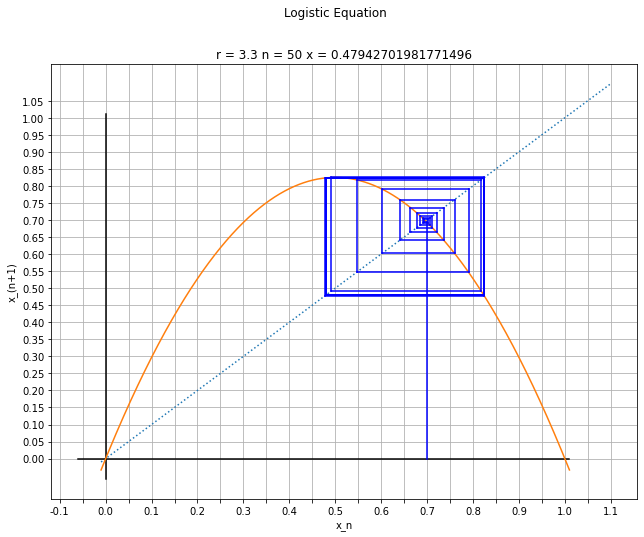

0.47942701982423386


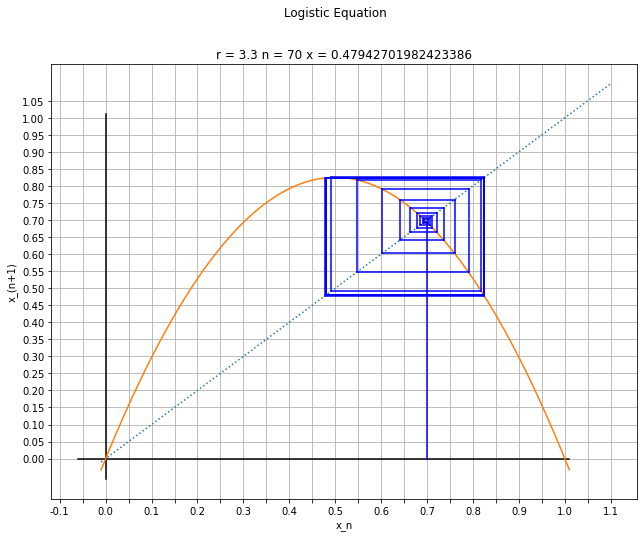

0.8236032832060688


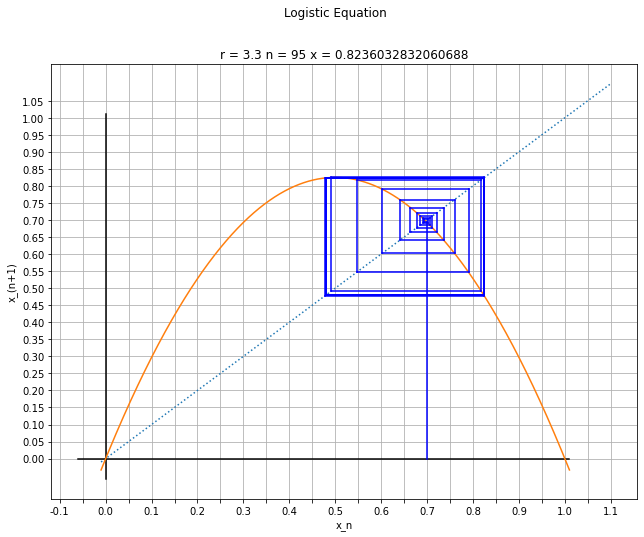

0.4794270198242343


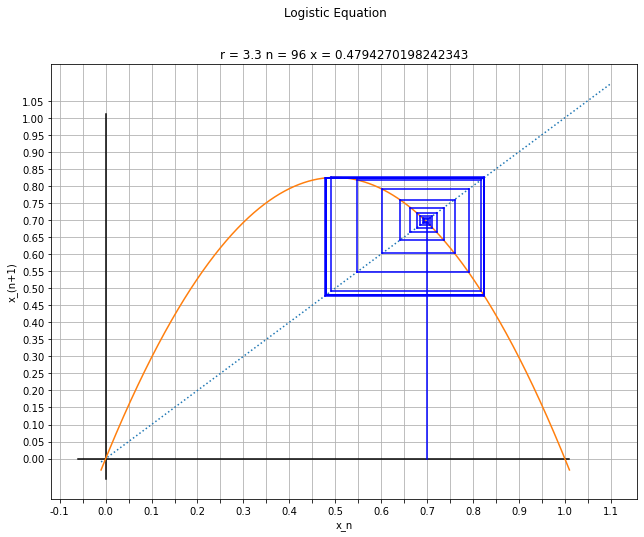

0.8236032832060689


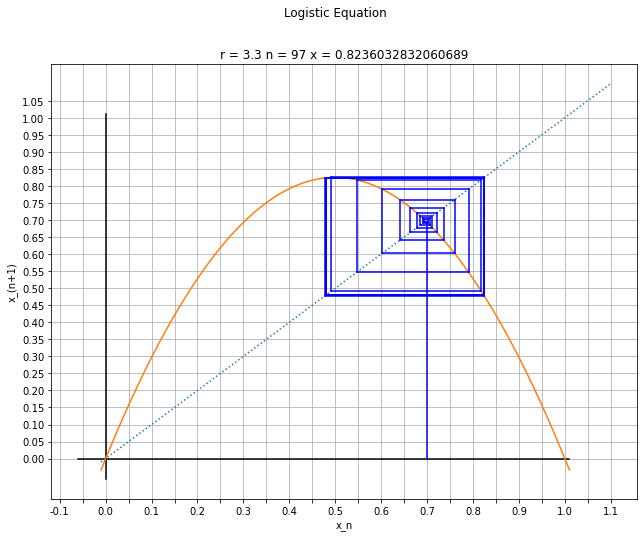

0.479427019824234


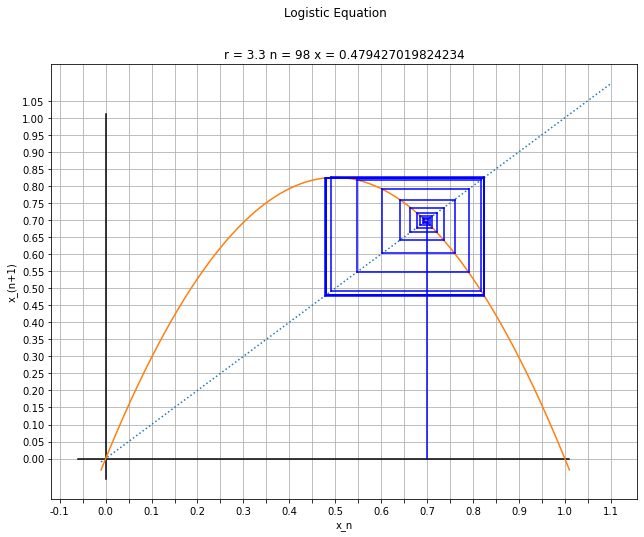

0.8236032832060687


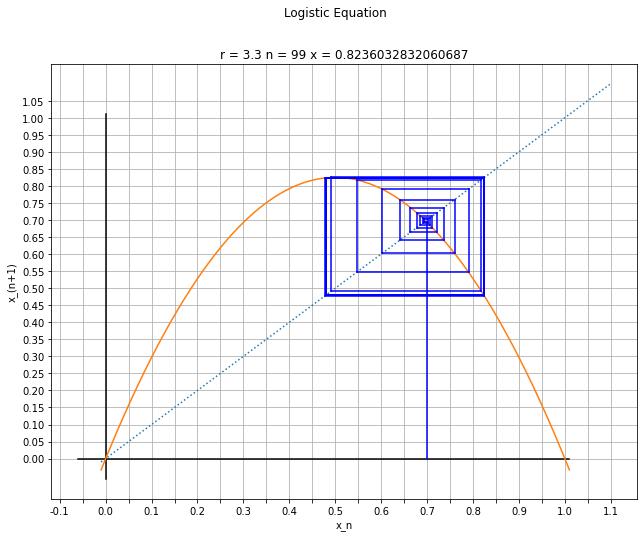

0.4794270198242346


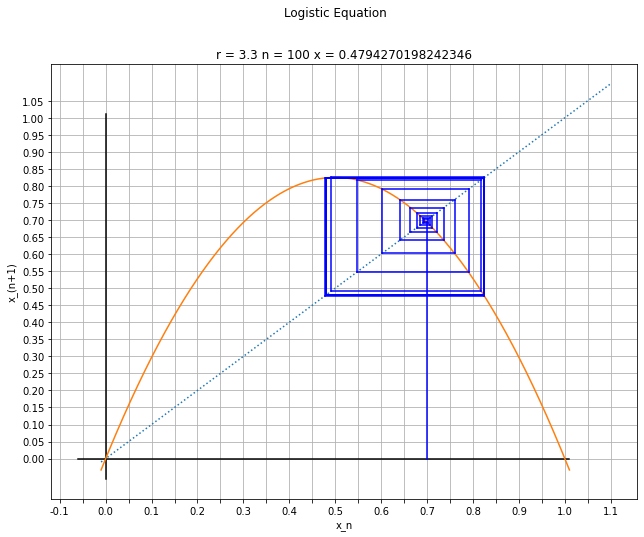

0.7


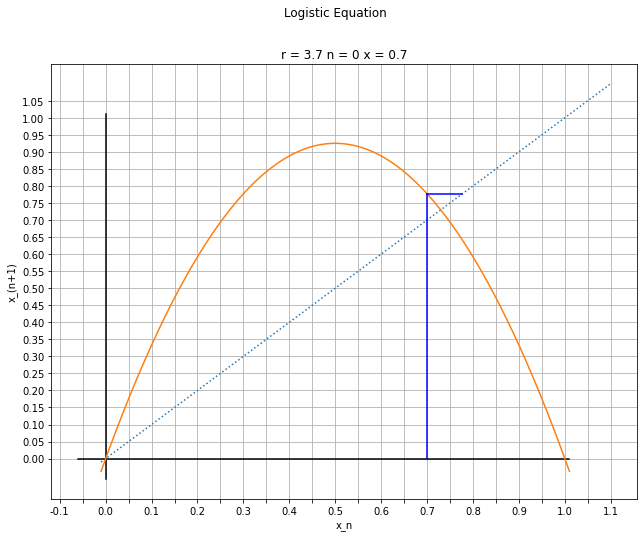

0.6411026999999998


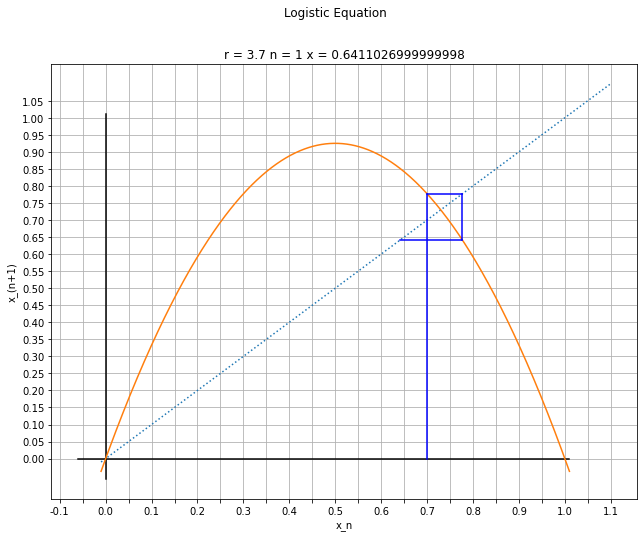

0.8513331037950272


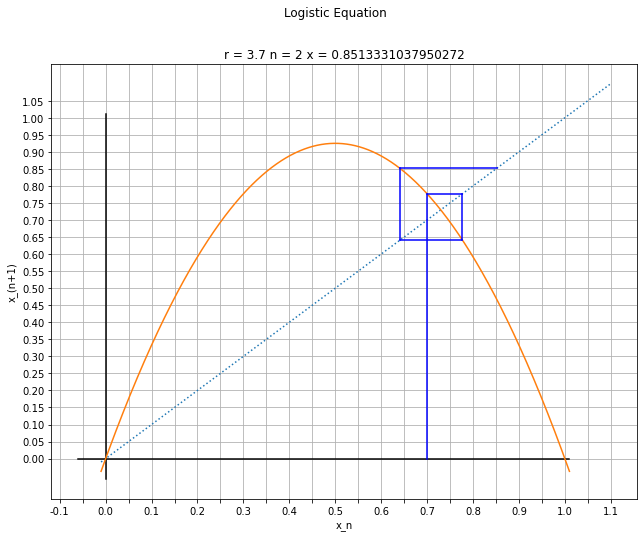

0.46829068565768467


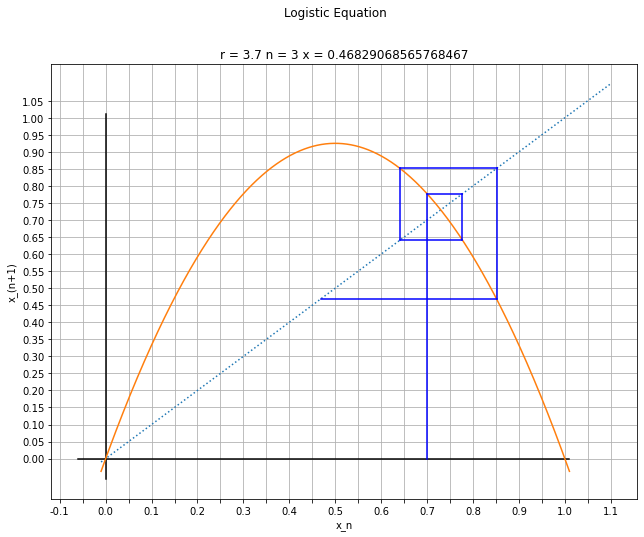

0.9212797217205788


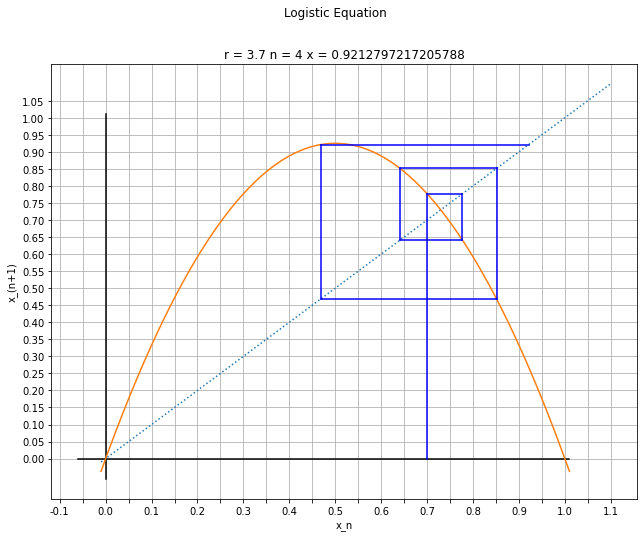

0.2683365654480172


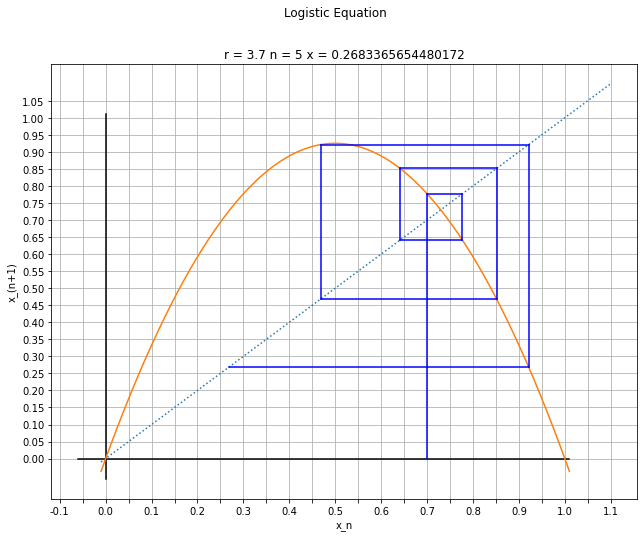

0.7353013356445216


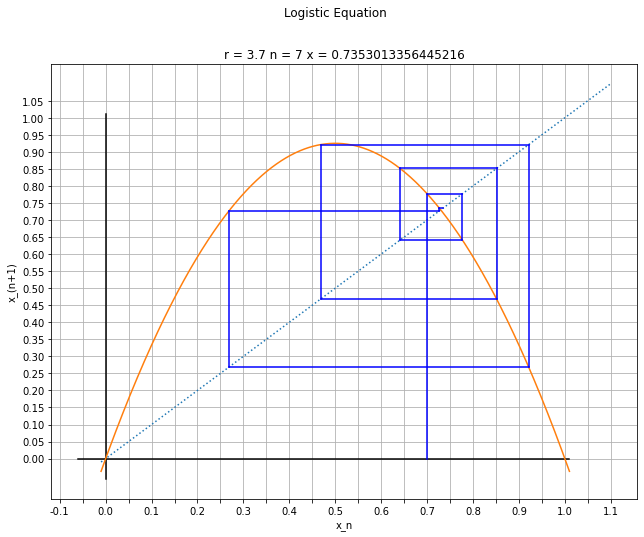

0.701660422551961


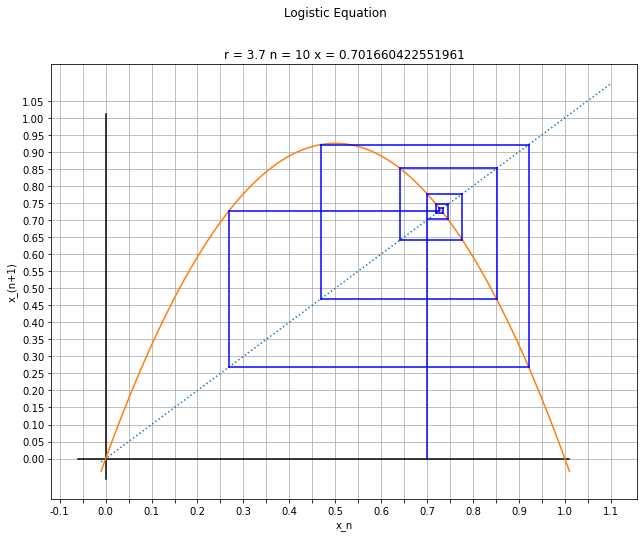

0.4820986816112685


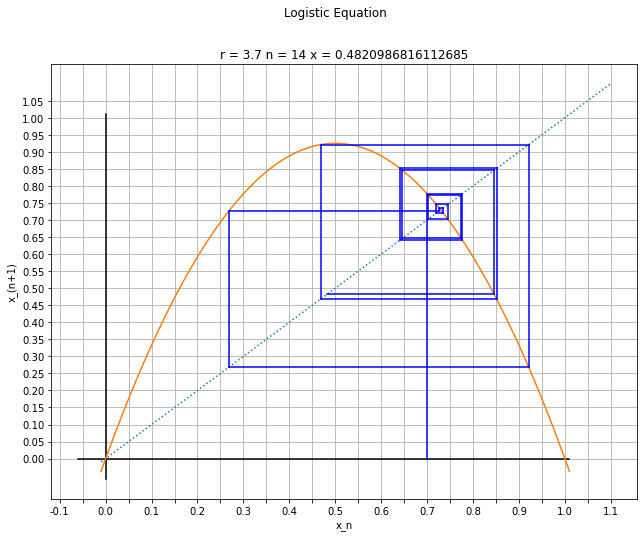

0.8061938764763371


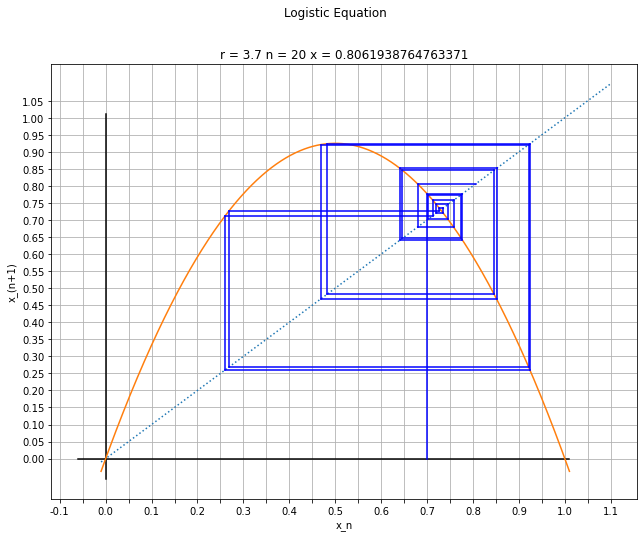

0.30232653236046825


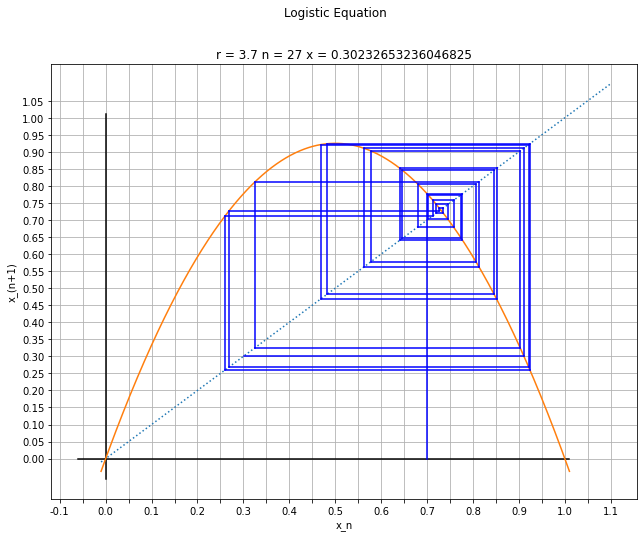

0.6829563398664551


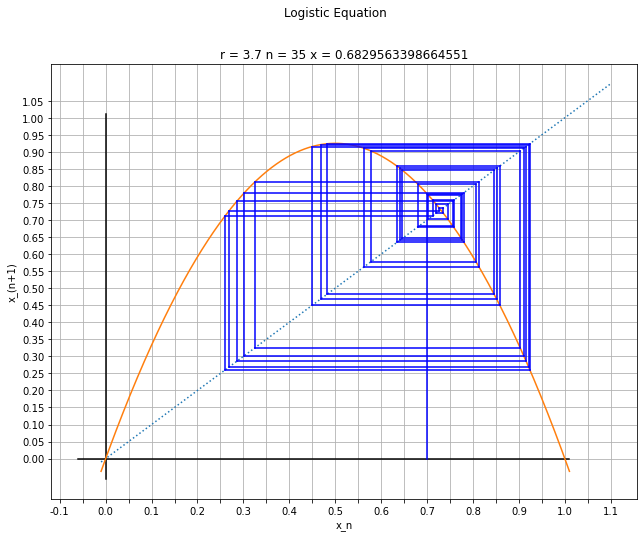

0.2614241001015932


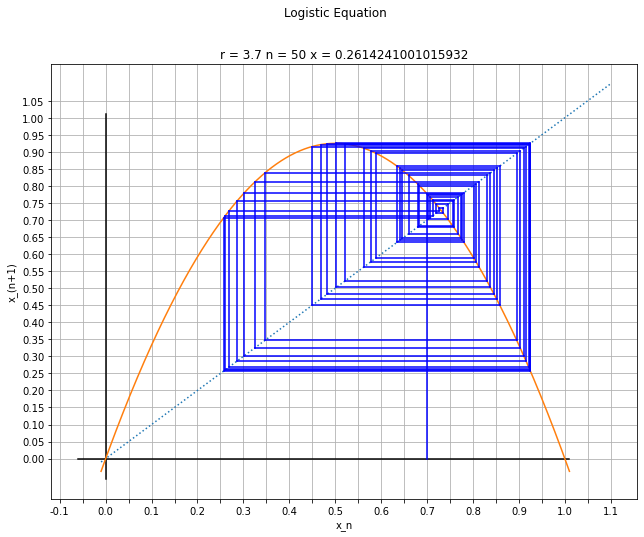

0.31095505077158514


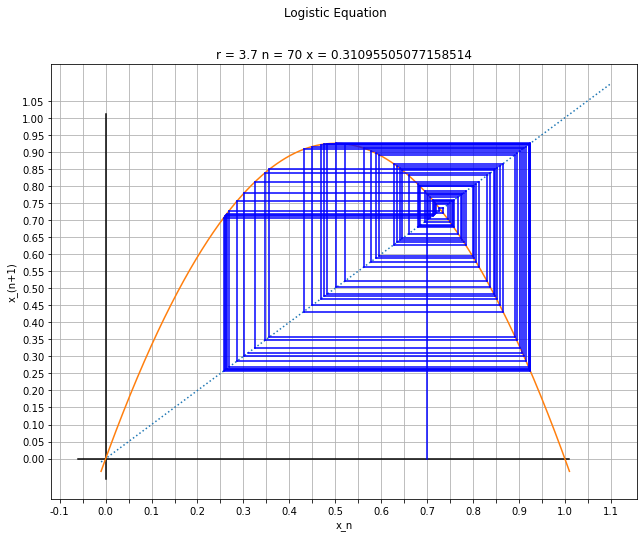

0.9218927616714246


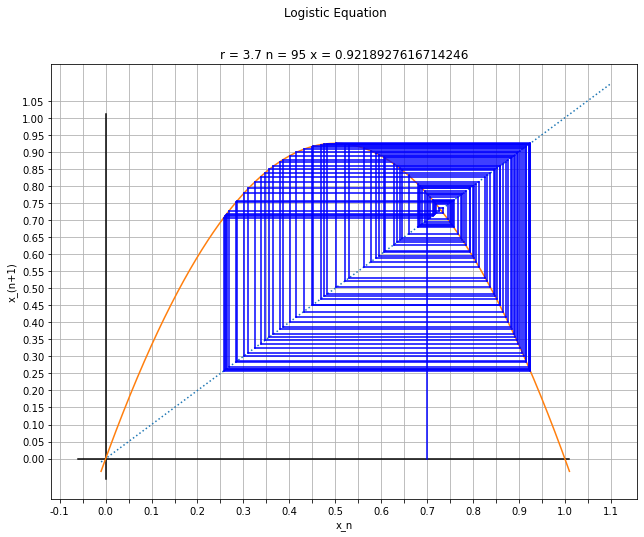

0.2664240413022564


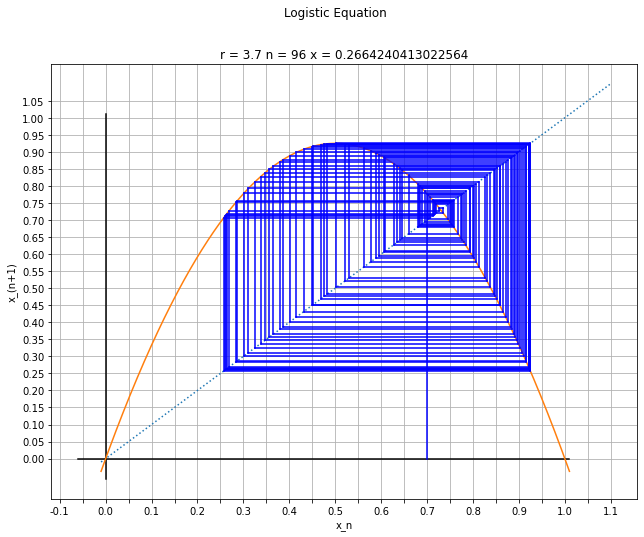

0.723136404618191


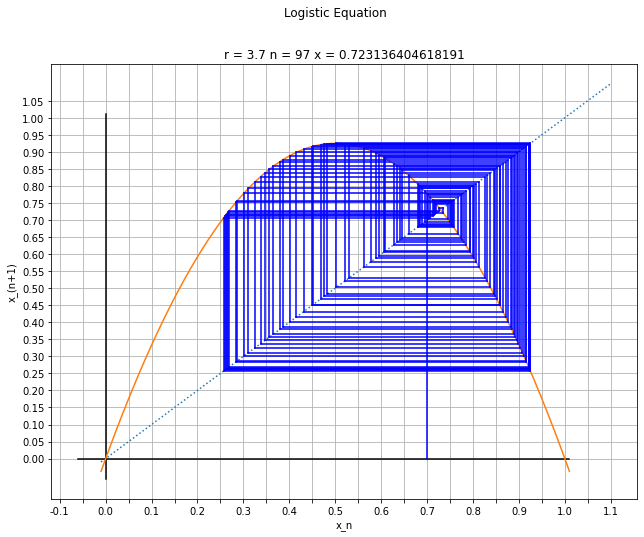

0.7407775362560478


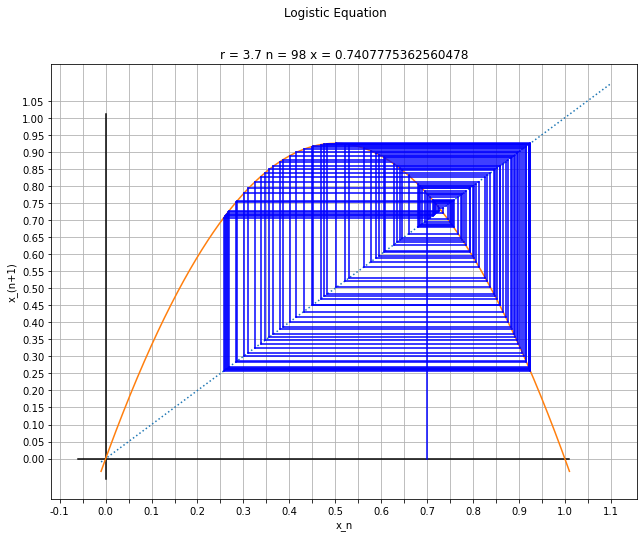

0.7104968587275301


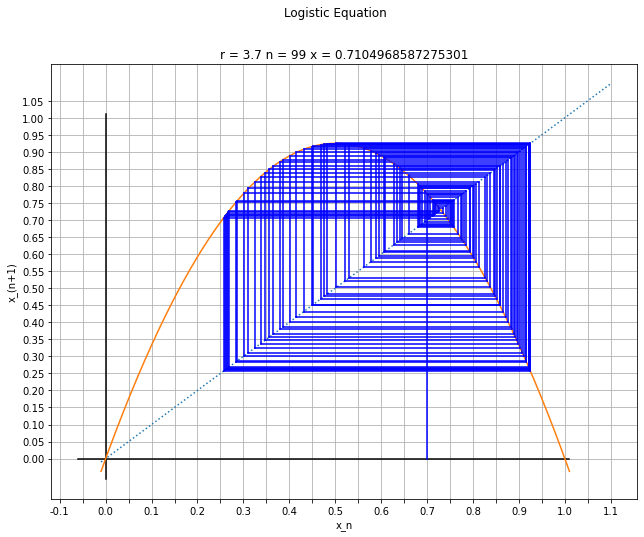

0.7610569681236162


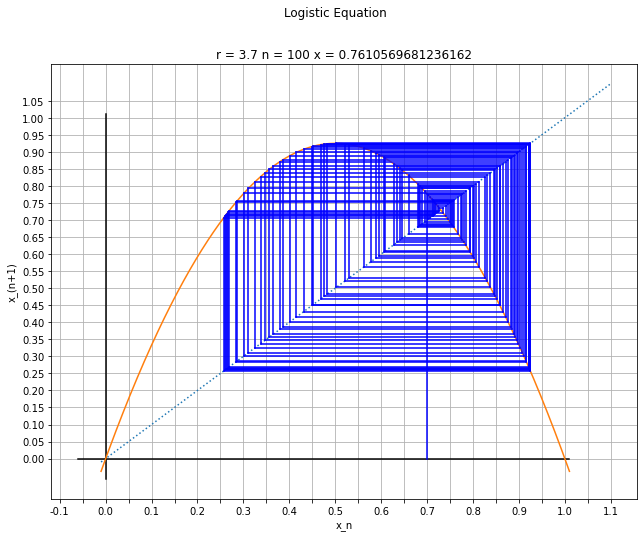

0.7


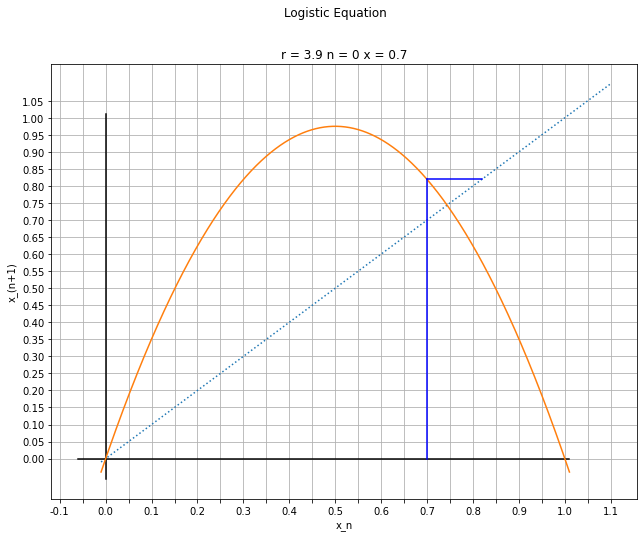

0.5781320999999998


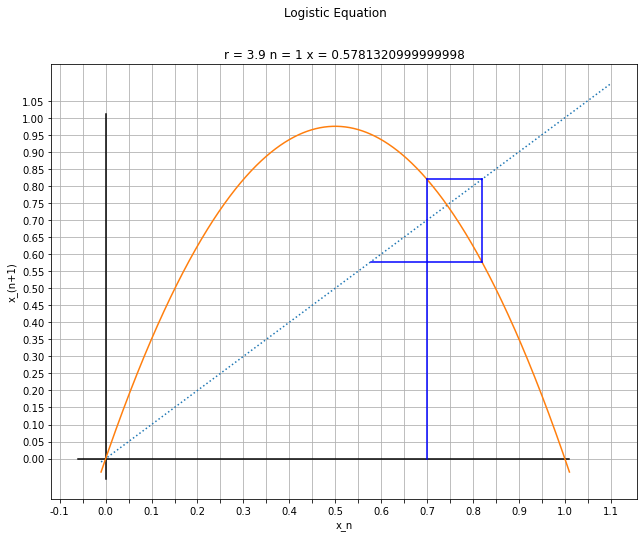

0.9511919623034011


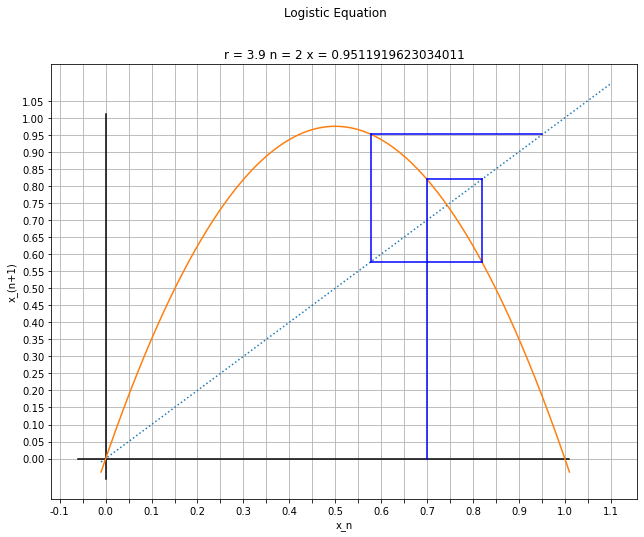

0.18106067129594453


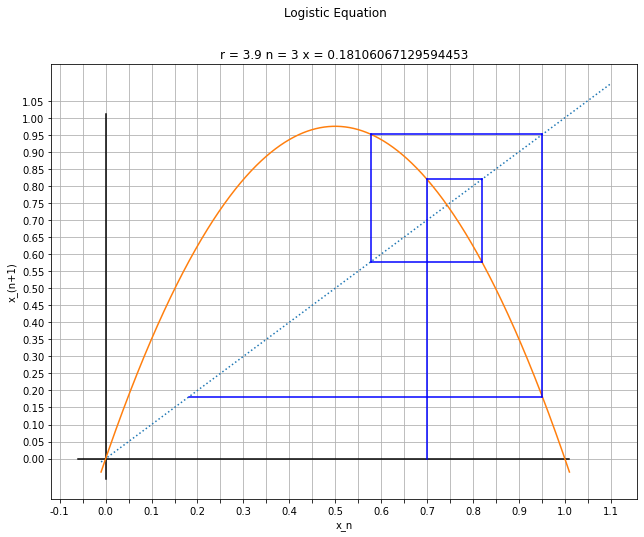

0.5782830479626452


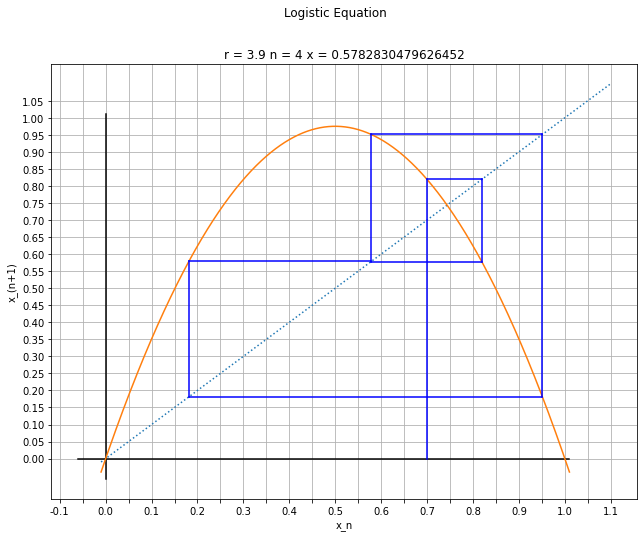

0.9510998811665449


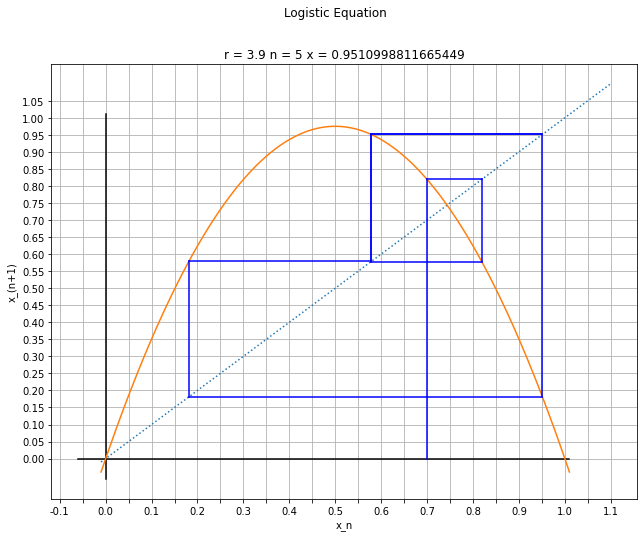

0.5790887311884089


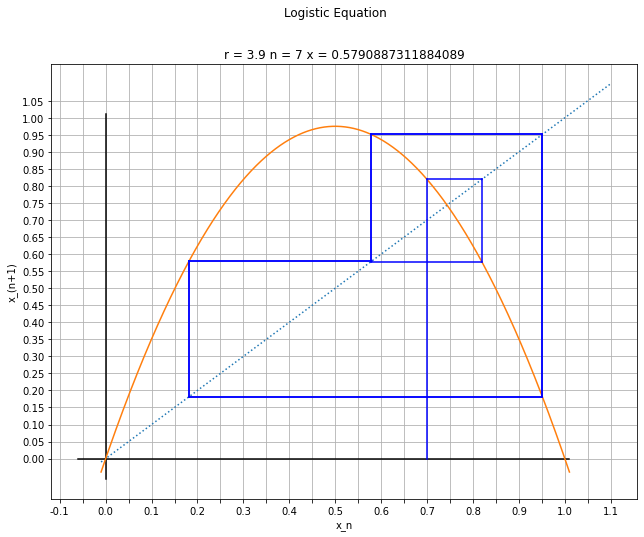

0.5833985544715115


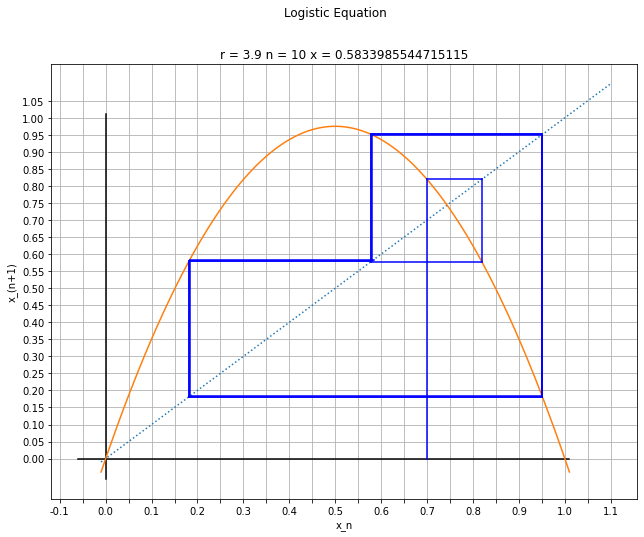

0.9306029597180671


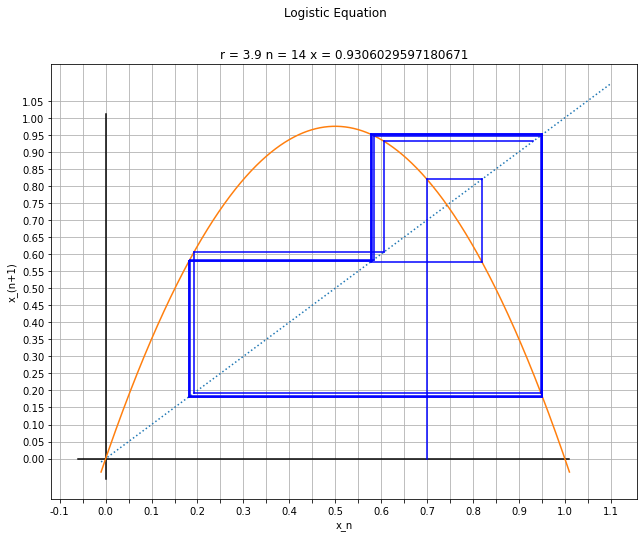

0.6233565526558802


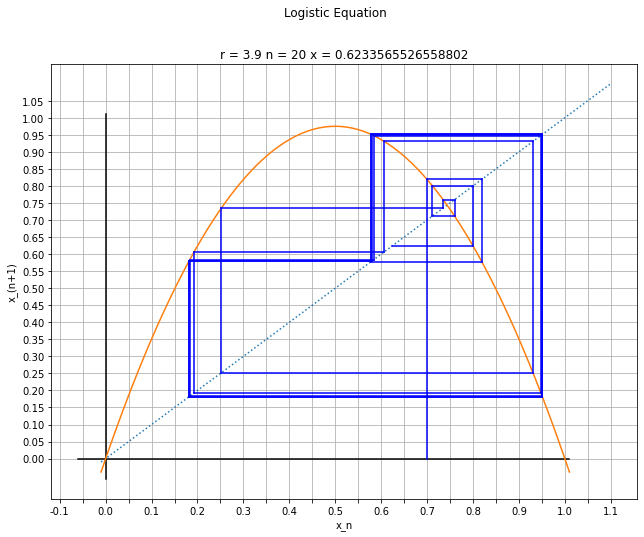

0.553675001479163


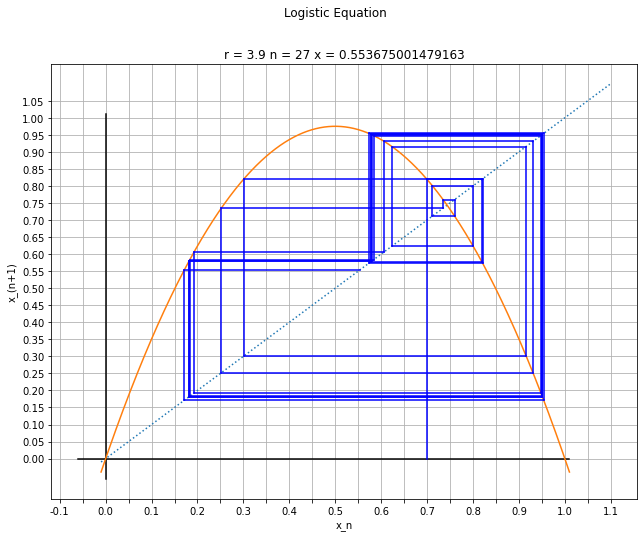

0.208193447854393


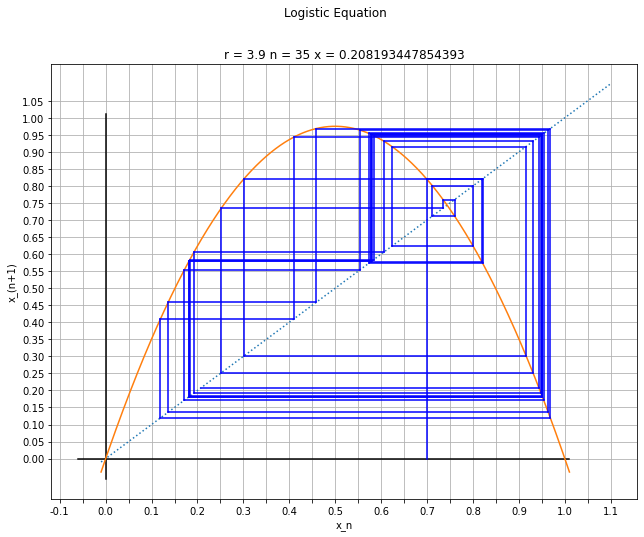

0.43702365672514326


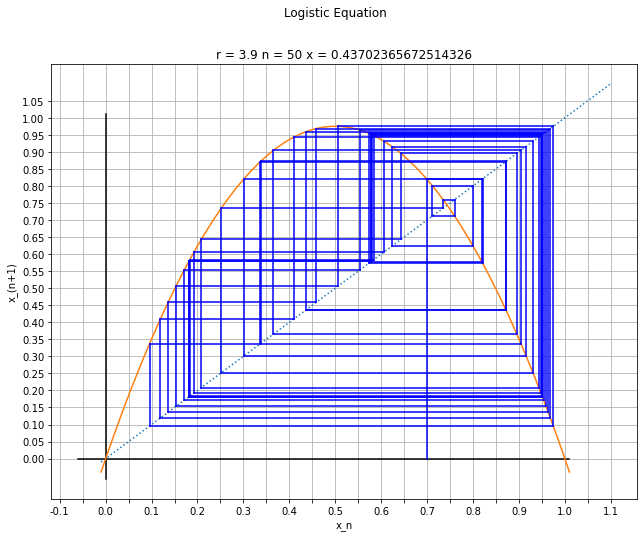

0.27494732297684904


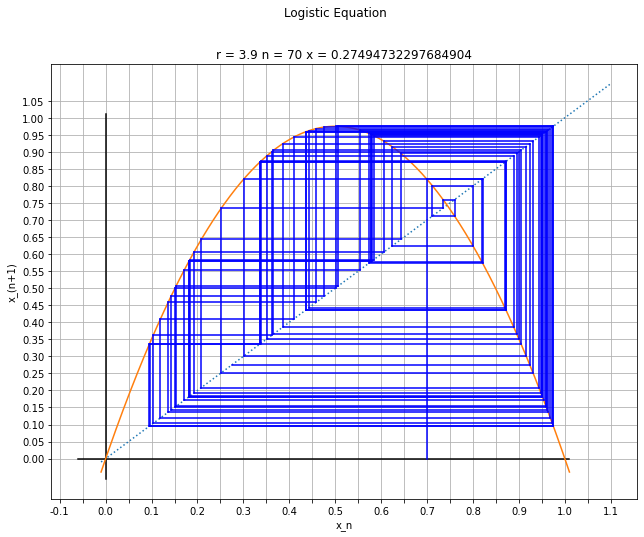

0.41411487742233166


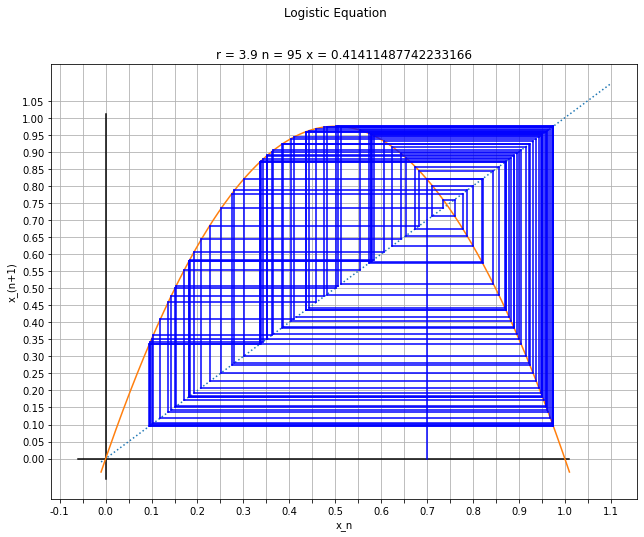

0.9462326083072936


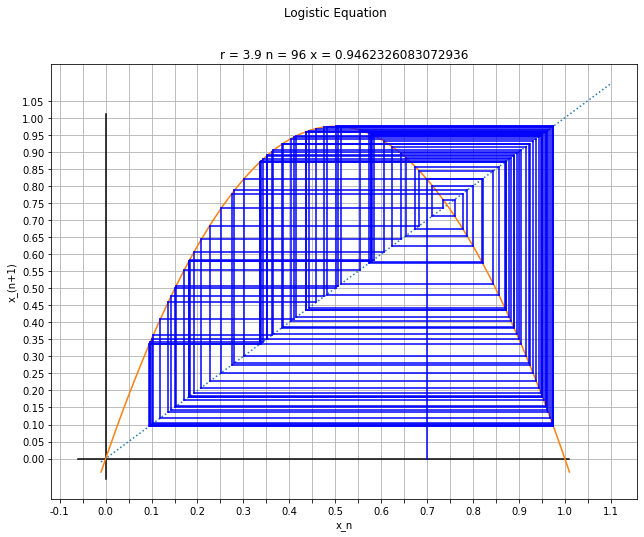

0.19841819120475096


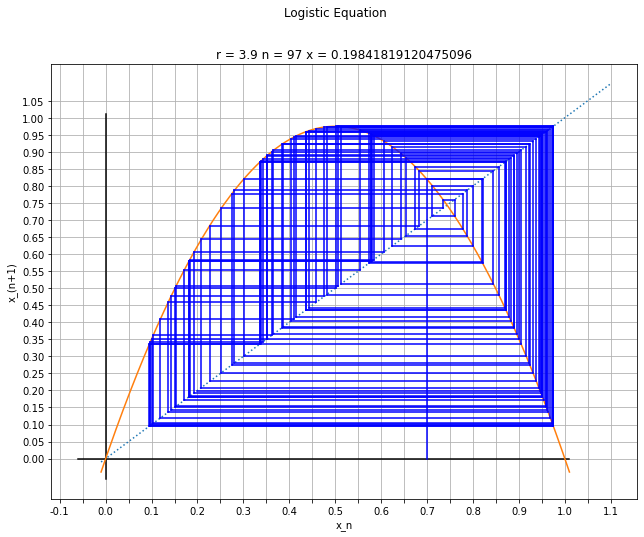

0.6202888091547648


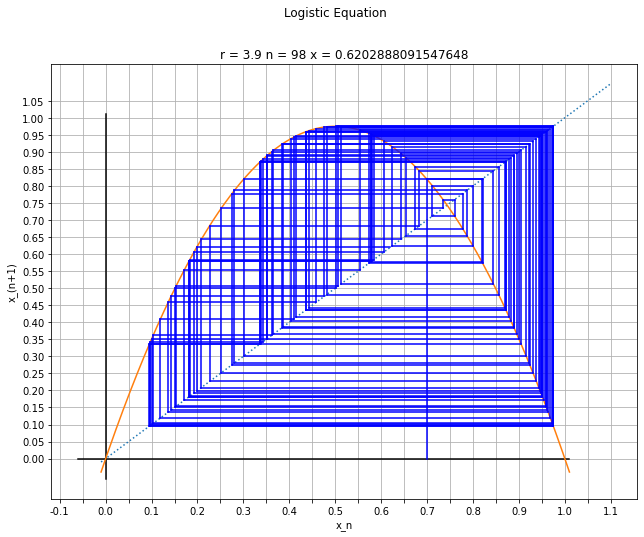

0.9185693493293013


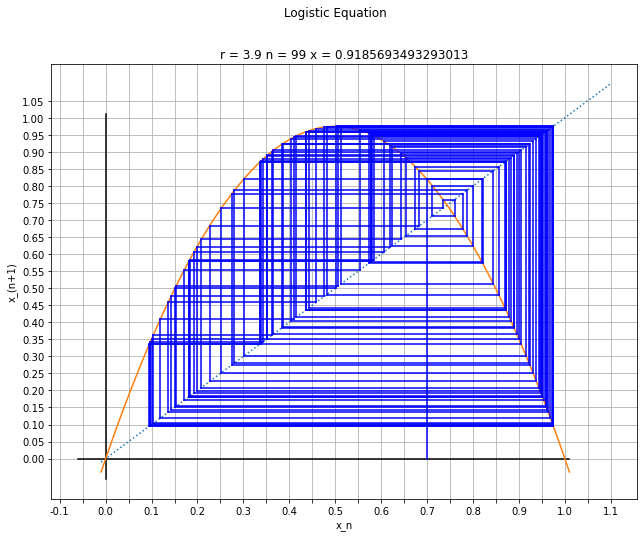

0.29171882922797665


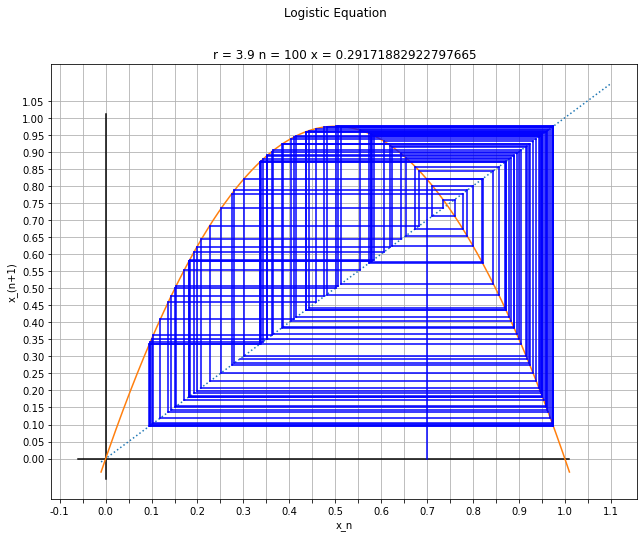

In [6]:
x_values = [.25]
r_values = [2,3.3,3.7,3.9]
n_values = [0,1,2,3,4,5,7,10,14,20,27,35,50,70,95,96,97,98,99,100]
for x in x_values:
    bifurcation_plot(x, True)
    for r in r_values:
        cwd = "C:/Users/ebott/Documents/GitHub/FractalExploration/EB Research/Presentation Supplies"
        path = "/CobwebPlots/" + "x_0=" + str(x) + "/r=" + str(r)
        Path(cwd + path).mkdir(parents=True, exist_ok=True)
        for n in n_values:
            makefig(r)
            cobwebplot_xo_r(r, x, "b", n)
            plt.savefig(cwd + path + "/web r=" + str(r) + " n=" + str(n) + " x_0=" + str(x) + ".png") # pass the option "True" if you want to save every step of the cobwebplot
            plt.show()